# 🚀 GST Analytics Hackathon Project

Welcome to my project submission for the **GST Analytics Hackathon**! This project aims to develop an innovative predictive model that can accurately classify entities within the GST system. Leveraging cutting-edge techniques in machine learning, this project addresses a complex binary classification problem using a large dataset provided by the GST Analytics team.

## 📁 Project Overview

- **Objective**: To create a supervised learning model that predicts whether a specific entity is classified as "0" or "1" based on various features.
- **Dataset**: The dataset contains 9 lakh records with 23 attributes, spread over training and testing sets.
- **Methodology**: The project involves data preprocessing, feature engineering, model training, and evaluation using various performance metrics.
- **Tools & Technologies**: Python, scikit-learn, XGBoost, Pandas, Optuna and more.

## 🔍 Key Evaluation Metrics

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC Curve**
- **Confusion Matrix**

## 🌟 Why This Project?

This project not only showcases my technical skills in data science but also contributes to the development of solutions that can enhance the efficiency of the GST system in India.

Let's dive in! 💡


## Importing libraries, data and getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn import metrics
from sklearn.calibration import CalibrationDisplay

from collections import Counter

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

import joblib
import os

seed = 0
np.random.seed(0)

In [2]:
xtrain = pd.read_csv('data/X_Train_Data_Input.csv')
xtest  = pd.read_csv('data/X_Test_Data_Input.csv')
ytrain = pd.read_csv('data/Y_Train_Data_Target.csv')
ytest  = pd.read_csv('data/Y_Test_Data_Target.csv')

## EDA For X Train

In [3]:
xtrain_id = xtrain['ID'] # Storing ID for later use
ytrain_id = ytrain['ID'] # Storing ID for later use
xtest_id = xtest['ID']   # Storing ID for later use
ytest_id = ytest['ID']   # Storing ID for later use

xtrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
ytrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
xtest.drop(columns = ['ID'], inplace=True)  # Dropping ID column for EDA + Modelling purpose
ytest.drop(columns = ['ID'], inplace=True)  # Dropping ID column for EDA + Modelling purpose


In [4]:
xtrain.head(10).T

,0,1,2,3,4,5,6,7,8,9
Column0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
Column1,2495.000000,2495.000000,2495.000000,211.000000,718.000000,886.000000,2495.000000,2495.000000,657.000000,647.000000
Column2,3726.000000,3454.000000,4543.000000,59.000000,950.000000,2842.000000,2612.000000,3053.000000,137.000000,1678.000000
Column3,0.678139,0.452580,-1.577453,NaN,-2.028572,-1.126335,-2.028572,0.678139,-0.404545,-2.028572
Column4,0.701403,0.701403,-1.429540,NaN,-1.855728,-1.216445,-1.855728,0.701403,-0.321449,-1.571603
Column5,-0.007468,-0.007468,-0.007469,NaN,NaN,-0.007469,-0.007468,-0.007468,-0.007467,-0.007469
Column6,0.434190,1.554998,-0.407939,-0.407939,-0.407939,-0.407939,-0.402851,-0.094001,-0.407939,-0.407939
Column7,-0.015603,-0.015574,-0.015607,-0.015607,-0.015607,-0.015607,-0.015607,-0.015605,-0.015607,-0.015607
Column8,0.606265,0.329946,-0.774979,-0.774979,-0.774979,-0.774979,0.673163,0.136592,0.634026,-0.774979
Column9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
round(xtrain.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.44,1.16,0.00,0.00,0.00,0.00,18.00
Column1,785133.0,1321.79,907.27,-1080.00,515.00,1173.00,2435.00,2499.00
Column2,785133.0,2951.28,2143.14,-47.00,1129.00,2709.00,4472.00,10290.00
Column3,658830.0,-0.00,1.00,-2.03,-0.68,0.68,0.68,0.68
Column4,657423.0,-0.00,1.00,-1.86,-0.58,0.70,0.70,0.70
Column5,617953.0,-0.00,1.02,-0.01,-0.01,-0.01,-0.01,551.42
Column6,781283.0,-0.00,1.00,-0.41,-0.41,-0.41,-0.37,14.99
Column7,785133.0,0.00,1.05,-0.02,-0.02,-0.02,-0.02,201.69
Column8,781283.0,-0.00,1.06,-0.77,-0.77,0.12,0.63,323.99
Column9,52996.0,0.01,1.11,-0.09,-0.09,-0.08,-0.06,133.91


In [6]:
info_xtrain = pd.DataFrame({
    'Num of unique values': xtrain.nunique(),   # Number of unique vales in each column
    'Standard Deviation': round(xtrain.std(), 2), # Standard deviation of each column
    'Varience': round(xtrain.var(), 2), # Variance of each column
    '% of Null values': round(xtrain.isna().mean() * 100, 2),  # Percentage NaN for each column
    '% of unique populated values': round(xtrain.nunique()/(xtrain.shape[0]-xtrain.isna().sum()) * 100) # Percentage oof unique populated values for each column
})
info_xtrain

,Num of unique values,Standard Deviation,Varience,% of Null values,% of unique populated values
Column0,19,1.16,1.35,0.00,0.0
Column1,2564,907.27,823135.16,0.00,0.0
Column2,9424,2143.14,4593049.66,0.00,1.0
Column3,47,1.00,1.00,16.09,0.0
Column4,47,1.00,1.00,16.27,0.0
Column5,148334,1.02,1.03,21.29,24.0
Column6,157264,1.00,1.00,0.49,20.0
Column7,166513,1.05,1.09,0.00,21.0
Column8,355728,1.06,1.12,0.49,46.0
Column9,49650,1.11,1.23,93.25,94.0


In [7]:
traces = {
    'marker_line_width': 1,
     'marker_line_color': 'black'
} # Parameters for visualizations

In [8]:
len(info_xtrain.index)

22

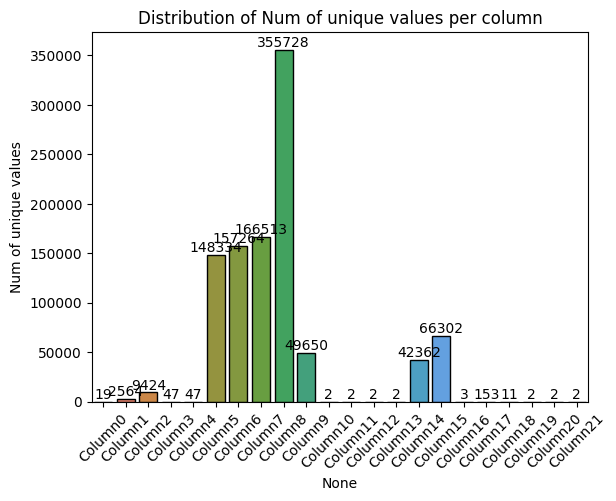

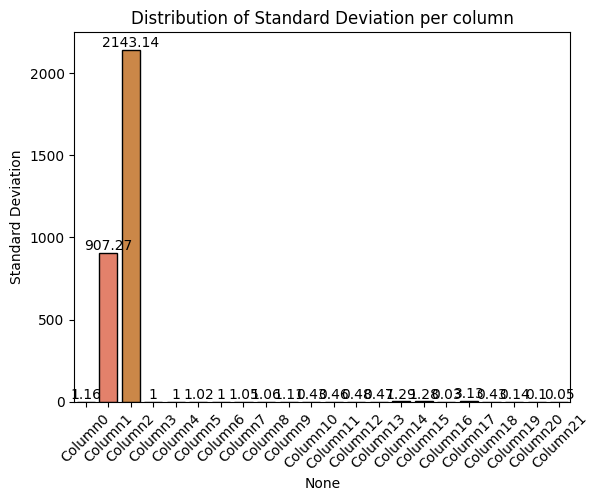

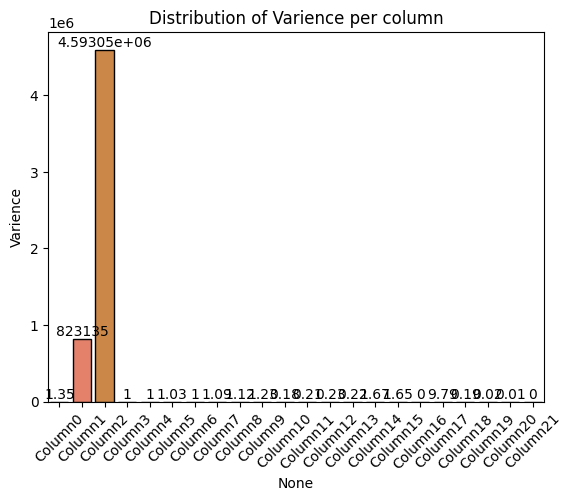

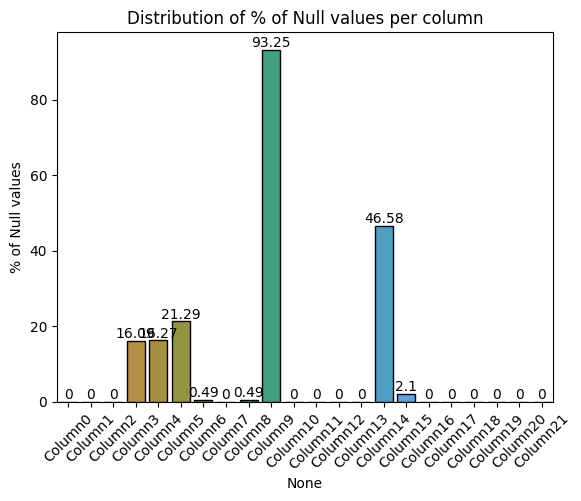

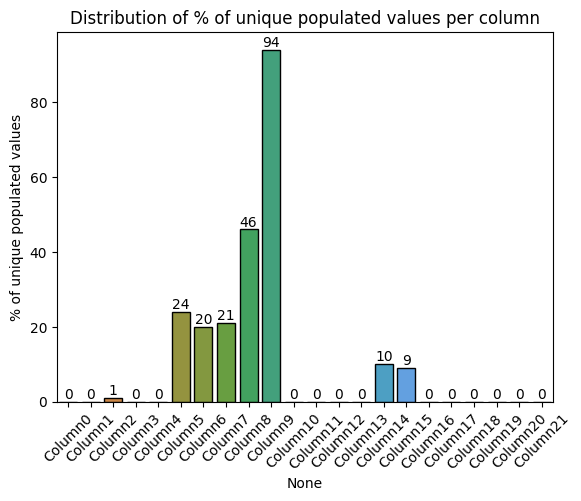

In [9]:
for col in info_xtrain.columns:
    ax = sns.barplot(data = info_xtrain,
                     y = info_xtrain[col],
                     x = info_xtrain.index,
                     hue = info_xtrain.index,
                     linewidth = 1,
                     edgecolor = 'black')
    ax.set(title = f'Distribution of {col} per column')
    for x in range(0, len(info_xtrain.index)):
        ax.bar_label(ax.containers[x])
    
    plt.xticks(rotation=45)
    plt.show()

Based on the unique counts and the descriptive analytics of the features, we can infer that: <br><br>
=> Features with low percentage of unique values would be categorical features, and conversly, columns with a higher percentage of unique values would be numeric features.
- Columns `0 - 9 and 14-18` seem to be _numeric features_.
- Columns `10-13 and 19-21` seem to be encoded _categorical features_. 

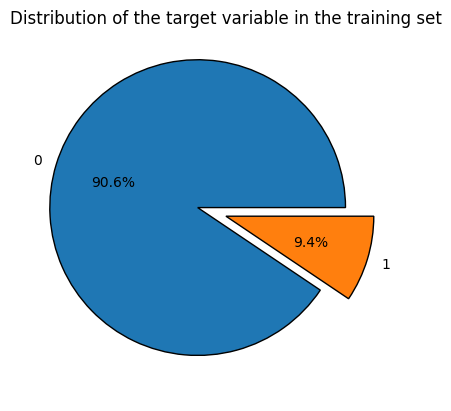

In [10]:
plt.pie(x = Counter(np.ravel(ytrain)).values(), 
        labels = Counter(np.ravel(ytrain)).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%',
        wedgeprops = {
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the training set')
plt.show()

### Visualizations for all columns in X Train

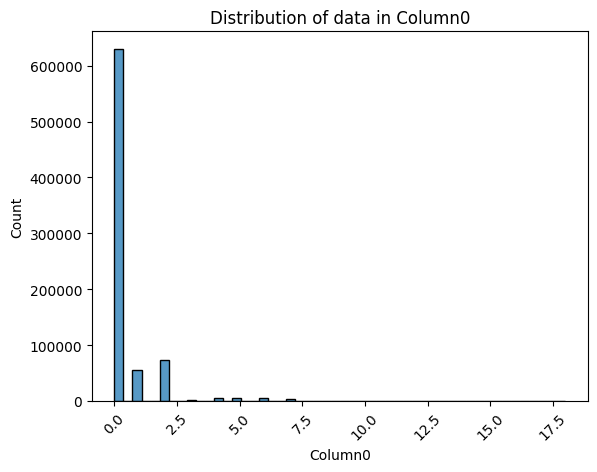

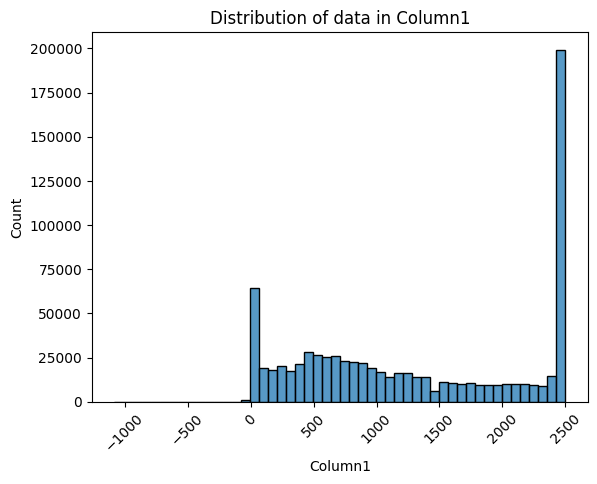

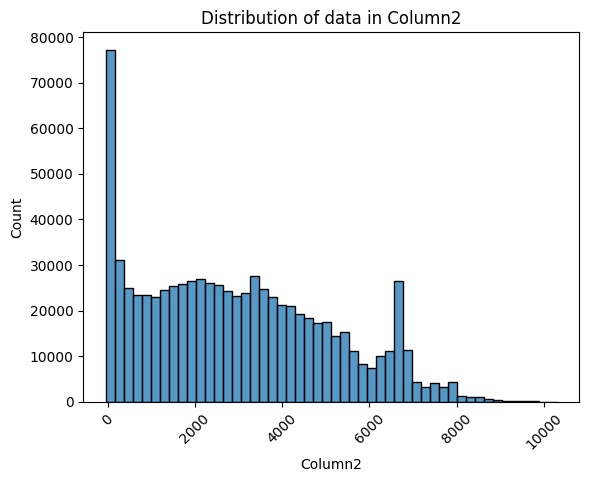

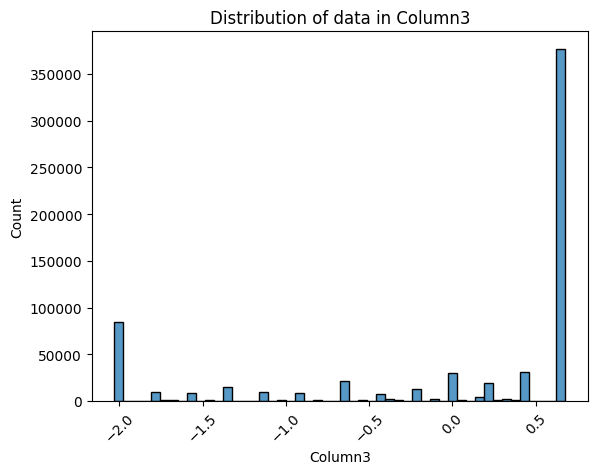

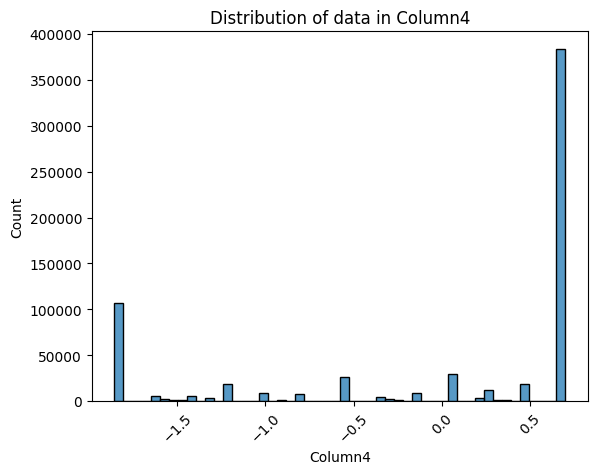

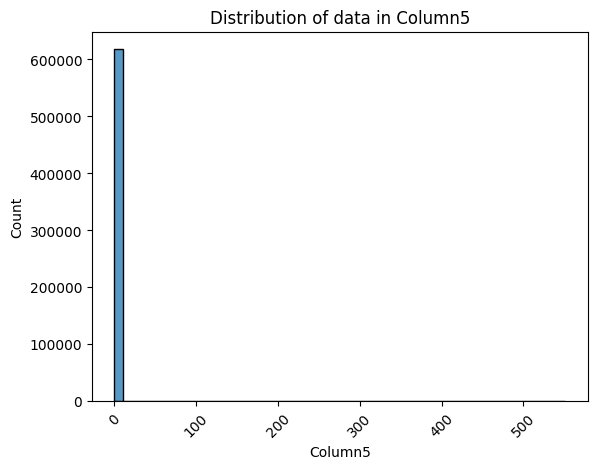

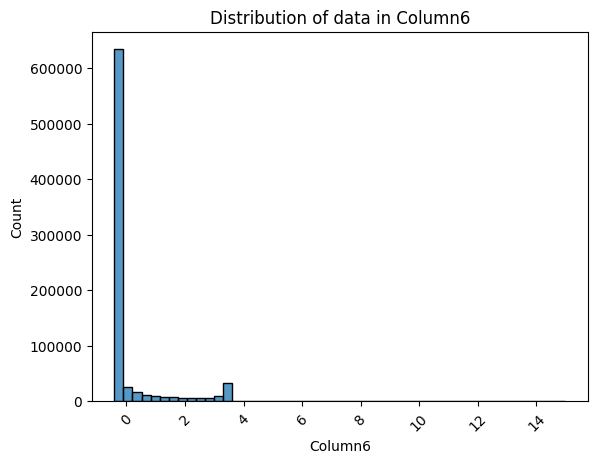

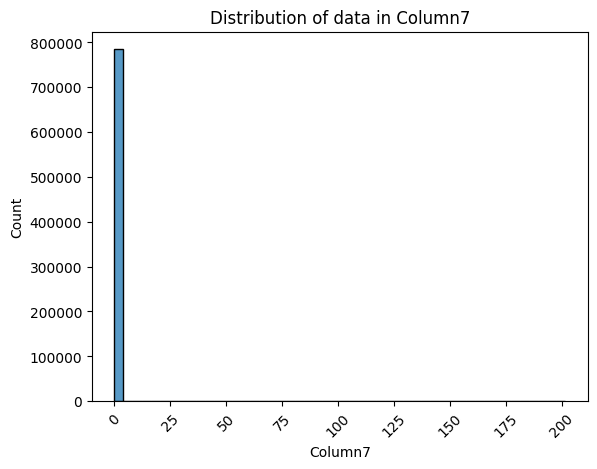

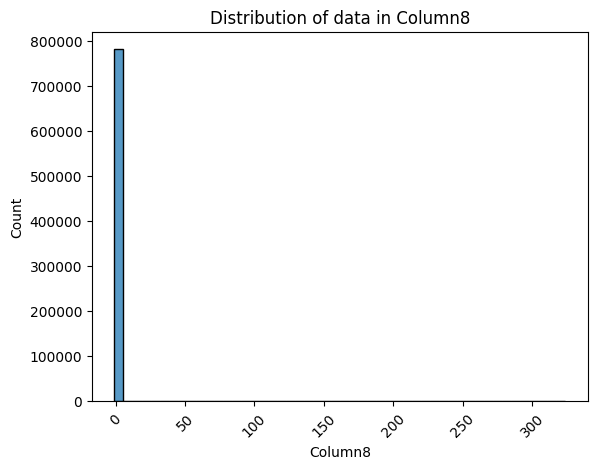

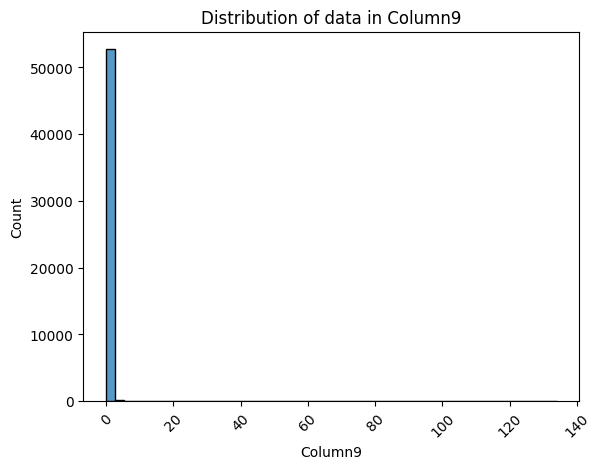

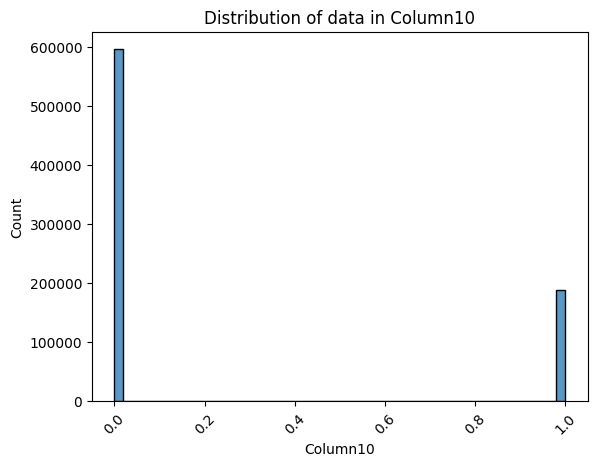

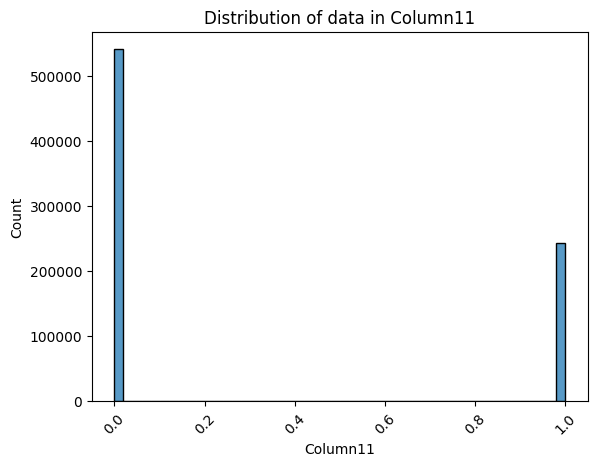

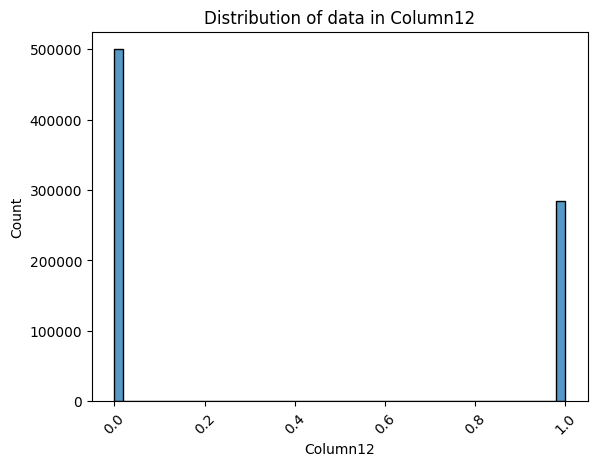

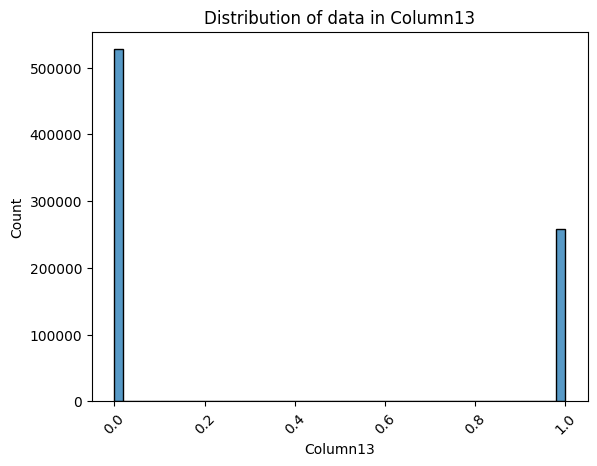

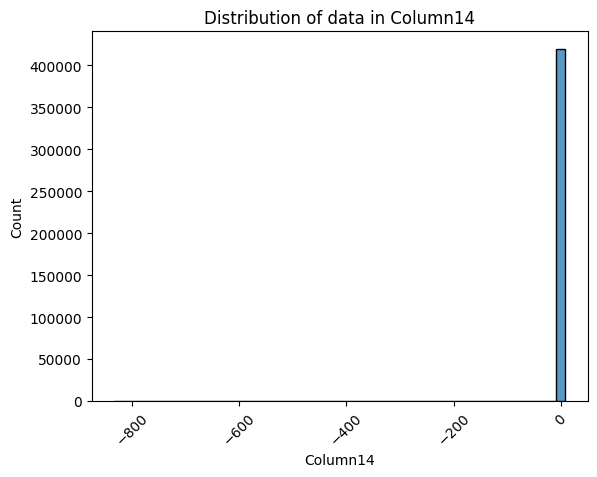

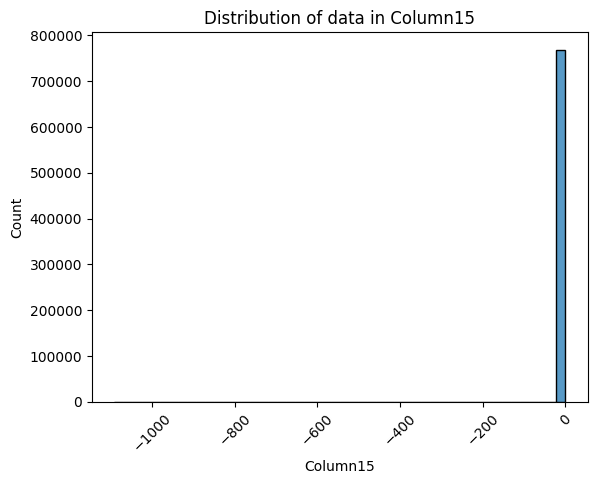

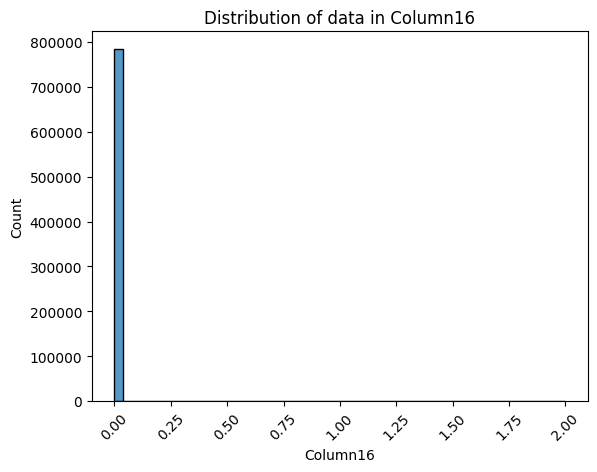

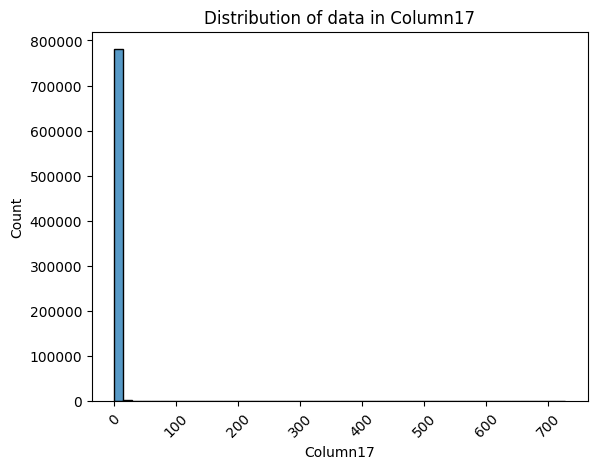

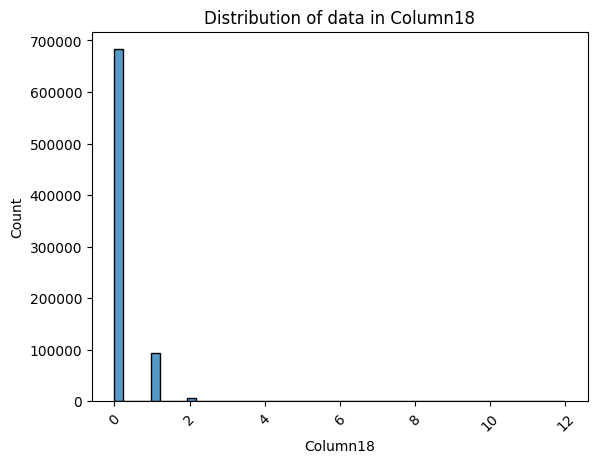

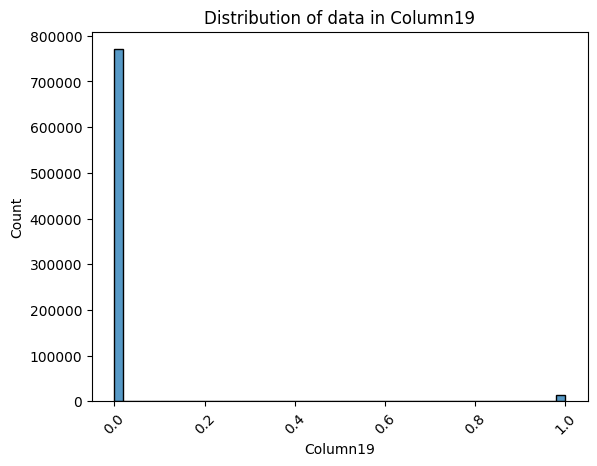

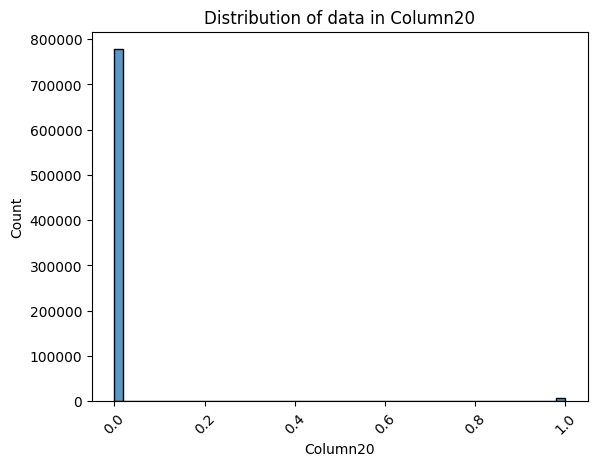

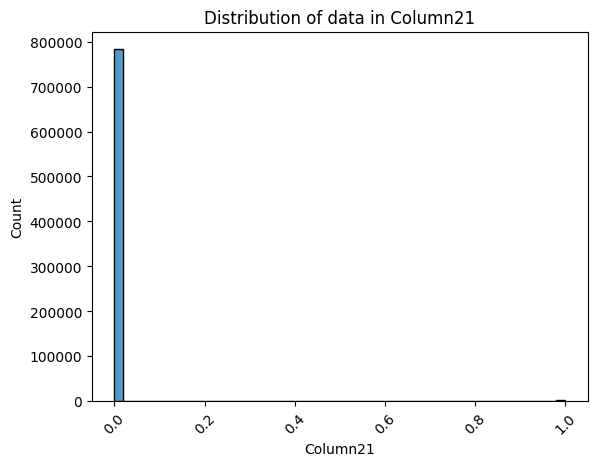

In [11]:
for col in xtrain.columns:
    ax = sns.histplot(data = xtrain,
                    #  y = xtrain[col],
                     x = xtrain[col], 
                    #  hue = xtrain[col],
                     legend = False,
                     linewidth = 1,
                     edgecolor = 'black',
                     bins = 50)
    ax.set(title = f'Distribution of data in {col}')
    
    plt.xticks(rotation=45)
    plt.show()

- There is a large class imbalance in the target dataset. We will use SMOTE to address this.
- There is also a lot of skew in the training features. We will use robust models to deal with this.

### Data Preprocessing

In [12]:
x_train, x_val, y_train, y_val = train_test_split(xtrain, 
                                                  ytrain, 
                                                  test_size=0.2, 
                                                  stratify = ytrain, 
                                                  random_state=seed) # Creating a stratified validation set

In [13]:
print("Training set class distribution in %:")
print(round(y_train.value_counts(normalize=True), 4)*100)

print("\nValidation set class distributionin %:")
print(round(y_val.value_counts(normalize=True), 4)*100)

Training set class distribution in %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64

Validation set class distributionin %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64


In [14]:
x_val.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
591545,0.0,426,4231.0,0.227021,0.062121,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
592178,0.0,514,2362.0,0.452580,0.062121,-0.007469,-0.407939,-0.015607,0.192057,NaN,...,0,1,0.001351,0.00339,0.0,0,1.0,0,0,0
475414,0.0,1245,2325.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
378155,1.0,2420,23.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015586,-0.774979,NaN,...,1,1,0.001351,0.00339,0.0,0,1.0,0,0,0
54492,0.0,1004,4182.0,0.678139,0.701403,-0.007468,0.315084,-0.015607,0.443411,NaN,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


In [15]:
y_val.head()

,target
591545,0
592178,1
475414,0
378155,0
54492,0


In [16]:
imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')

In [17]:
y_train_ravel = np.ravel(y_train)
y_val_ravel = np.ravel(y_val)

In [18]:
model = []
f1_score_vanilla_model = []
n_neighbors = []

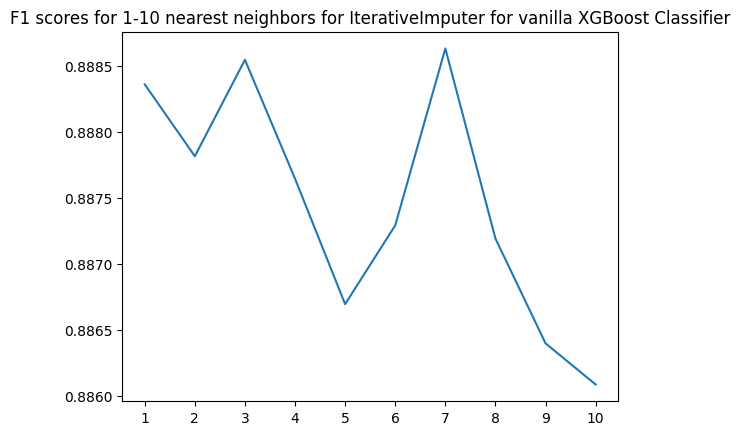

In [19]:
f1_XGB = []
imp_neighbors_XGB = []

model_XGB = XGBClassifier(random_state = seed, n_jobs= - 1)

for num in np.linspace(1, 10, 10, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)

    model_XGB.fit(x_train_imp, y_train_ravel)
    model_XGB_pred = model_XGB.predict(x_val_imp)

    f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)

    f1_XGB.append(f1_score)
    imp_neighbors_XGB.append(num)

sorted_scores = sorted(zip(f1_XGB, imp_neighbors_XGB))

sorted_f1_score = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_f1_score)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='F1 scores for 1-10 nearest neighbors for IterativeImputer for vanilla XGBoost Classifier')

plt.show()

In [20]:
model.append('XGBoost')
f1_score_vanilla_model.append(max(sorted_scores)[0])
n_neighbors.append(max(sorted_scores)[1])

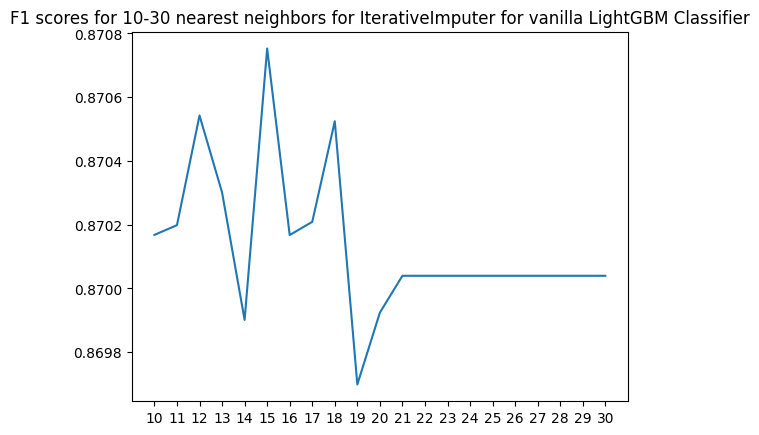

In [21]:
f1_LGBM = []
imp_neighbors_LGBM = []

model_LGBM = LGBMClassifier(random_state = seed, n_jobs= - 1, class_weight = 'balanced', verbose = 0)

for num in range(10, 31):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)

    model_LGBM.fit(x_train_imp, y_train_ravel)
    model_LGBM_pred = model_LGBM.predict(x_val_imp)

    f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)

    f1_LGBM.append(f1_score)
    imp_neighbors_LGBM.append(num)

sorted_scores = sorted(zip(f1_LGBM, imp_neighbors_LGBM))

sorted_f1 = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_f1)
ax.set_xticks(range(10, 31))
ax.set(title='F1 scores for 10-30 nearest neighbors for IterativeImputer for vanilla LightGBM Classifier')

plt.show()

In [22]:
model.append('LightGBM')
n_neighbors.append(max(sorted_scores)[1])
f1_score_vanilla_model.append(max(sorted_scores)[0])

Compiling F1 scores in one DataFrame, we get

In [23]:
vanilla_f1_scores = pd.DataFrame({
    'Model': model,
    'n_neighbors': n_neighbors,
    'Score': f1_score_vanilla_model
})

In [24]:
vanilla_f1_scores

,Model,n_neighbors,Score
0,XGBoost,7,0.888631
1,LightGBM,15,0.870753


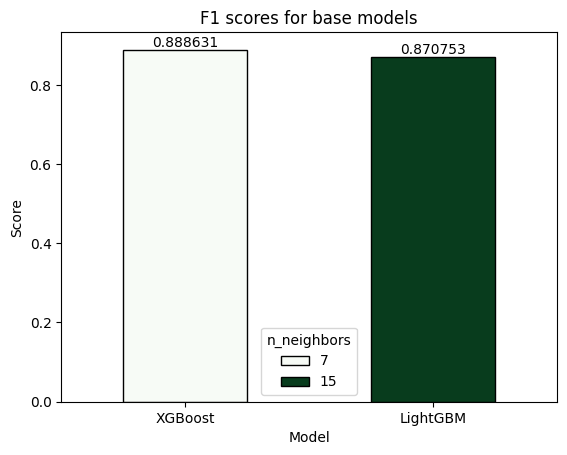

In [25]:
ax = sns.barplot(data=vanilla_f1_scores, 
                  x = vanilla_f1_scores['Model'], 
                  y = vanilla_f1_scores['Score'],
                  hue=vanilla_f1_scores['n_neighbors'],
                  edgecolor = 'black',
                  linewidth = 1,
                  palette = 'Greens',
                  width = 0.5)
ax.set(title = 'F1 scores for base models')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Vanilla **XGBoost model** gives us the better F1 score.

### Metrics on validation set

In [26]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['XGBoost' ,'LightGBM']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [27]:
for model_name in model_list:
    
    model_list1.append(model_name)

    if model_name == 'XGBoost':

        imputer.set_params(n_nearest_features = vanilla_f1_scores['n_neighbors'][0])
    
        x_train_imp = imputer.fit_transform(x_train)
        x_val_imp = imputer.transform(x_val)

        model_XGB.fit(x_train_imp, y_train_ravel)
        model_XGB_pred = model_XGB.predict(x_val_imp)
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_XGB_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_XGB_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_pred)
        balanced_accuracy_list.append(balanced_accuracy)

    elif model_name == 'LightGBM':

        imputer.set_params(n_nearest_features = vanilla_f1_scores['n_neighbors'][1])
    
        x_train_imp = imputer.fit_transform(x_train)
        x_val_imp = imputer.transform(x_val)

        model_LGBM.fit(x_train_imp, y_train_ravel)
        model_LGBM_pred = model_LGBM.predict(x_val_imp)
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_LGBM_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_LGBM_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_pred)
        balanced_accuracy_list.append(balanced_accuracy)

In [28]:
model_scores = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [29]:
model_scores

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977857,0.849605,0.929763,0.887878,0.956314,0.798103,0.956314
1,LightGBM,0.972068,0.772872,0.996691,0.870627,0.983098,1.006753,0.983098


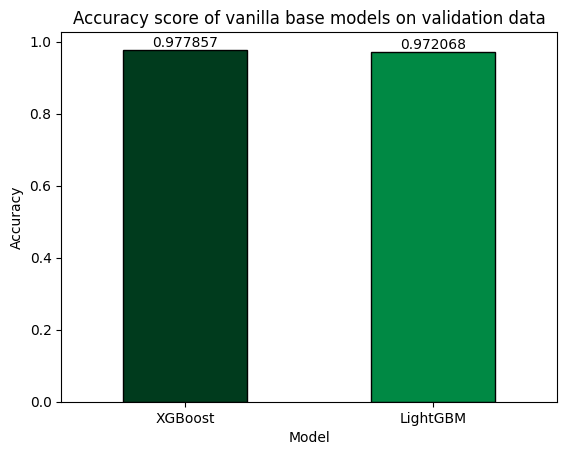

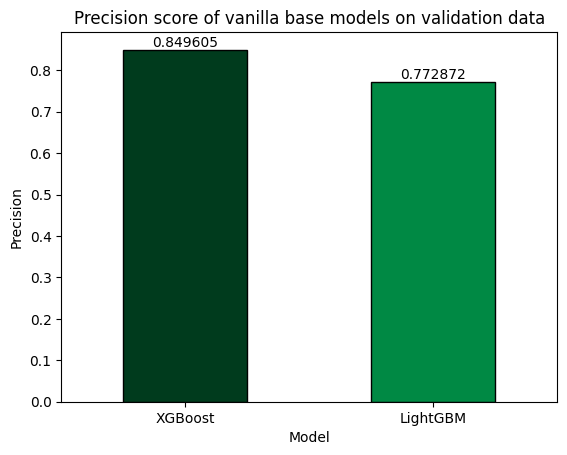

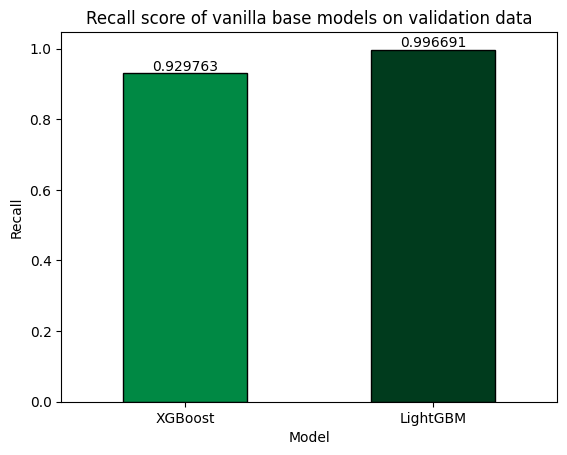

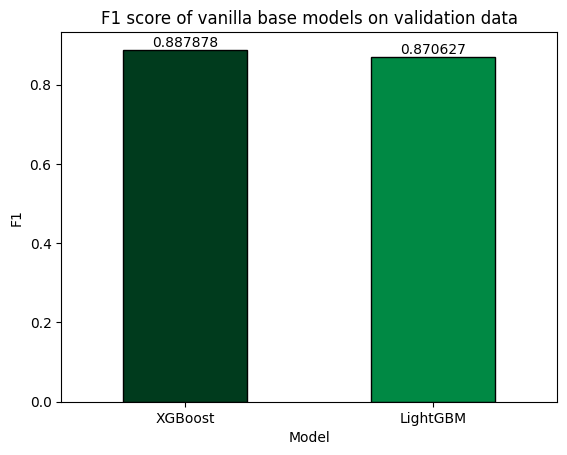

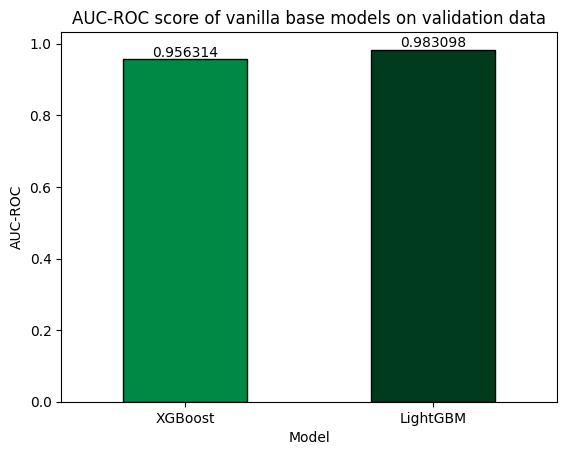

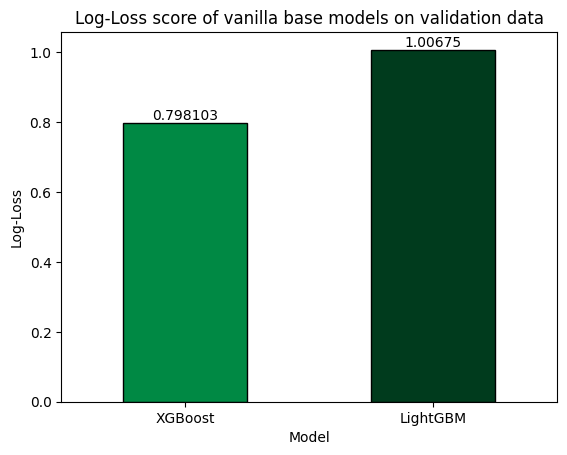

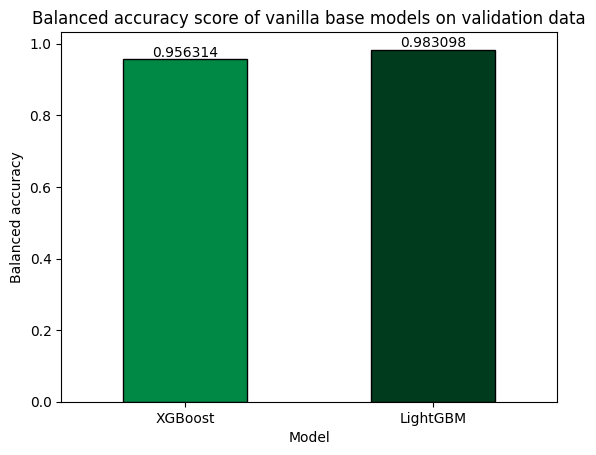

In [30]:
for col in model_scores.columns[1:]:

    ax = sns.barplot(data=model_scores, 
                     x = 'Model', 
                     y = col,
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1,
                     legend = False,
                     palette = 'Greens',
                     width = 0.5)
    
    for i, bar in enumerate(ax.patches):

        height = bar.get_height()  # Get the bar height (value)
        if height == max(model_scores[col]):
            bar.set_facecolor('#003b1d')  # Dark green for higher values
        else:
            bar.set_facecolor('#008944')  # Light green for lower values

    ax.set_title(f'{col} score of vanilla base models on validation data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

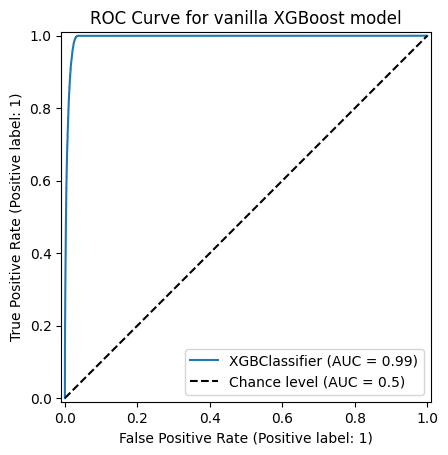

Classification report for vanilla XGBoost: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    142220
           1       0.85      0.93      0.89     14807

    accuracy                           0.98    157027
   macro avg       0.92      0.96      0.94    157027
weighted avg       0.98      0.98      0.98    157027



In [31]:
roc_curve_lgbm = metrics.RocCurveDisplay.from_estimator(model_XGB, 
                                                        x_val_imp, 
                                                        y_val_ravel, 
                                                        plot_chance_level=True)
plt.title('ROC Curve for vanilla XGBoost model')
plt.show()

classification_report_XGB = metrics.classification_report(y_val_ravel, model_XGB_pred)
print("Classification report for vanilla XGBoost: \n\n", classification_report_XGB)

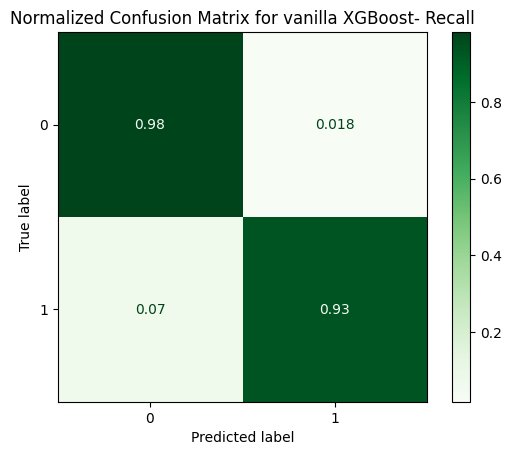

In [32]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- Recall')
plt.show()

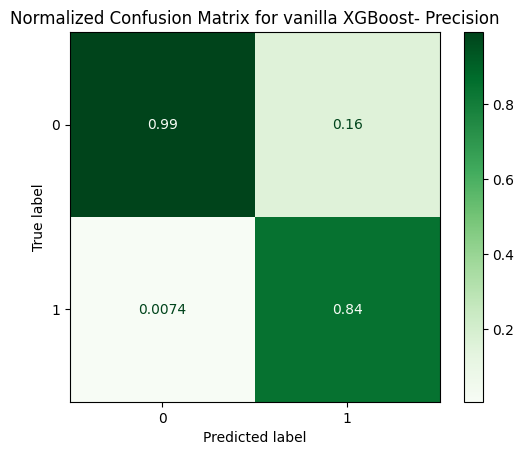

In [33]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- Precision')
plt.show()

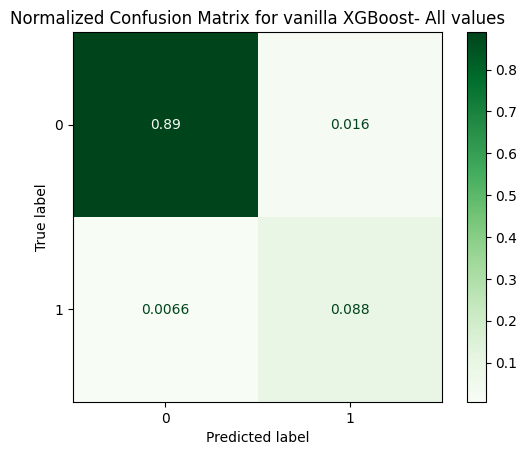

In [34]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- All values')
plt.show()

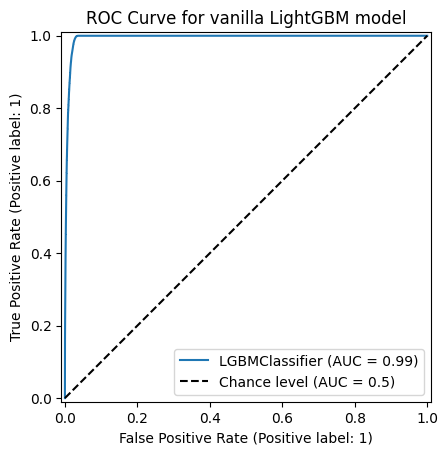

Classification report for vanilla LightGBM:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    142220
           1       0.77      1.00      0.87     14807

    accuracy                           0.97    157027
   macro avg       0.89      0.98      0.93    157027
weighted avg       0.98      0.97      0.97    157027



In [35]:
roc_curve_lgbm = metrics.RocCurveDisplay.from_estimator(model_LGBM, 
                                                        x_val_imp, 
                                                        y_val_ravel, 
                                                        plot_chance_level=True)
plt.title('ROC Curve for vanilla LightGBM model')
plt.show()

classification_report_LGBM = metrics.classification_report(y_val_ravel, model_LGBM_pred)
print("Classification report for vanilla LightGBM:\n\n", classification_report_LGBM)

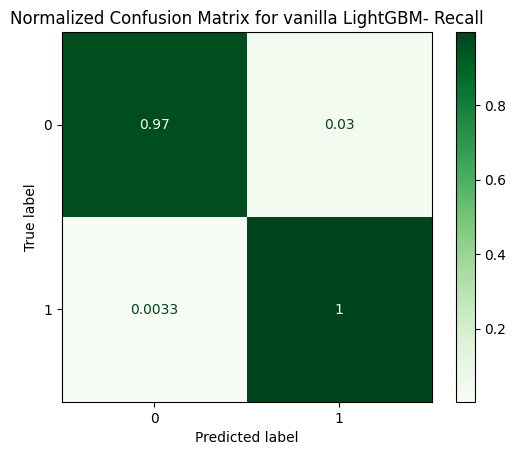

In [36]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- Recall')
plt.show()

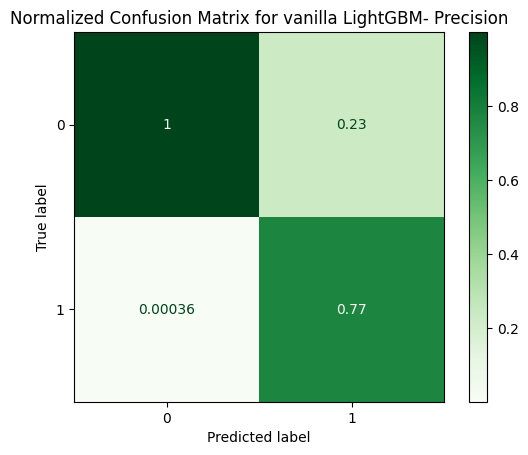

In [37]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- Precision')
plt.show()

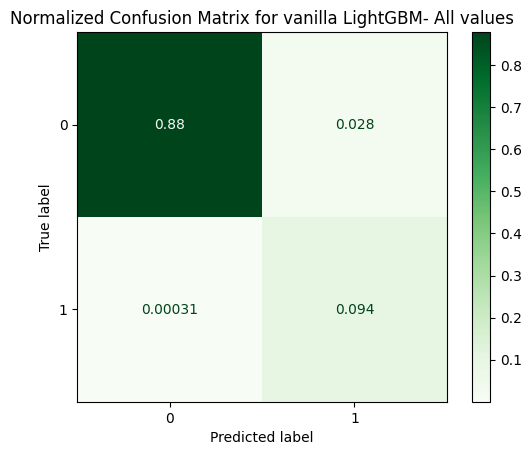

In [38]:
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- All values')
plt.show()

In [39]:
f1_scores_upsampled = []
n_neighbors_upsampled = []

## Model building

In [40]:
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.440757,1.163275,0.000000,0.000000,0.000000,0.000000,18.000000
Column1,785133.0,1321.788614,907.267965,-1080.000000,515.000000,1173.000000,2435.000000,2499.000000
Column2,785133.0,2951.279411,2143.140140,-47.000000,1129.000000,2709.000000,4472.000000,10290.000000
Column3,658830.0,-0.000210,0.999935,-2.028572,-0.675216,0.678139,0.678139,0.678139
Column4,657423.0,-0.000855,1.000350,-1.855728,-0.577162,0.701403,0.701403,0.701403
Column5,617953.0,-0.000367,1.015255,-0.007469,-0.007469,-0.007469,-0.007468,551.421127
Column6,781283.0,-0.000709,0.998984,-0.407939,-0.407939,-0.407939,-0.367723,14.985817
Column7,785133.0,0.000727,1.045883,-0.015607,-0.015607,-0.015607,-0.015607,201.687947
Column8,781283.0,-0.000158,1.056769,-0.774979,-0.774979,0.122085,0.625528,323.992484
Column9,52996.0,0.005245,1.111058,-0.088554,-0.086503,-0.081820,-0.063140,133.911803


In [41]:
cat_cols = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
num_cols = [x for x in xtrain.columns if x not in cat_cols]

In [42]:
vanilla_f1_scores

,Model,n_neighbors,Score
0,XGBoost,7,0.888631
1,LightGBM,15,0.870753


In [43]:
imputer_xgb = IterativeImputer(n_nearest_features = vanilla_f1_scores['n_neighbors'][0], 
                               add_indicator = True, 
                               random_state = seed).set_output(transform = 'pandas')

imputer_lgbm = IterativeImputer(n_nearest_features = vanilla_f1_scores['n_neighbors'][1], 
                                add_indicator = True, 
                                random_state = seed).set_output(transform = 'pandas')

In [44]:
sc = StandardScaler().set_output(transform='pandas')

In [45]:
impute_xgb = make_column_transformer(
    (imputer_xgb, make_column_selector(dtype_exclude=None)),
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

scale_xgb = make_column_transformer(
    (sc, num_cols),
    remainder = 'passthrough',
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

xgb_preprocess_pipeline = make_pipeline(impute_xgb, scale_xgb)

In [46]:
impute_lgbm = make_column_transformer(
    (imputer_lgbm, make_column_selector(dtype_exclude=None)),
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

scale_lgbm = make_column_transformer(
    (sc, num_cols),
    remainder = 'passthrough',
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

lgbm_preprocess_pipeline = make_pipeline(impute_lgbm, scale_lgbm)

In [47]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['XGBoost' ,'LightGBM']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [48]:
xgb_scaled_train = xgb_preprocess_pipeline.fit_transform(x_train, y_train_ravel)
lgbm_scaled_train = lgbm_preprocess_pipeline.fit_transform(x_train, y_train_ravel)

xgb_scaled_val = xgb_preprocess_pipeline.transform(x_val)
lgbm_scaled_val = lgbm_preprocess_pipeline.transform(x_val)

model_XGB = XGBClassifier(random_state = seed,
                          n_jobs = -1)

model_LGBM = LGBMClassifier(random_state = seed,
                            n_jobs= - 1, 
                            is_unbalance = True,
                            verbose = 0)

model_XGB.fit(xgb_scaled_train, y_train_ravel)
model_LGBM.fit(lgbm_scaled_train, y_train_ravel)

model_XGB_pred = model_XGB.predict(xgb_scaled_val)
model_LGBM_pred = model_LGBM.predict(lgbm_scaled_val)

In [49]:
for model_name in model_list:
    
    model_list1.append(model_name)

    if model_name == 'XGBoost':

        XGB_scaled_accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_pred)
        accuracy_list.append(XGB_scaled_accuracy)

        XGB_scaled_precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
        precision_list.append(XGB_scaled_precision)

        XGB_scaled_recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
        recall_list.append(XGB_scaled_recall)

        XGB_scaled_f1 = metrics.f1_score(y_val_ravel, model_XGB_pred)
        f1_list.append(XGB_scaled_f1)

        XGB_scaled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_XGB_pred)
        auc_roc_list.append(XGB_scaled_roc_auc)

        XGB_scaled_log_loss = metrics.log_loss(y_val_ravel, model_XGB_pred)
        log_loss_list.append(XGB_scaled_log_loss)

        XGB_scaled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_pred)
        balanced_accuracy_list.append(XGB_scaled_balanced_accuracy)


    elif model_name == 'LightGBM':

        LGBM_scaled_accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_pred)
        accuracy_list.append(LGBM_scaled_accuracy)

        LGBM_scaled_precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
        precision_list.append(LGBM_scaled_precision)

        LGBM_scaled_recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
        recall_list.append(LGBM_scaled_recall)

        LGBM_scaled_f1 = metrics.f1_score(y_val_ravel, model_LGBM_pred)
        f1_list.append(LGBM_scaled_f1)

        LGBM_scaled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_LGBM_pred)
        auc_roc_list.append(LGBM_scaled_roc_auc)

        LGBM_scaled_log_loss = metrics.log_loss(y_val_ravel, model_LGBM_pred)
        log_loss_list.append(LGBM_scaled_log_loss)

        LGBM_scaled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_pred)
        balanced_accuracy_list.append(LGBM_scaled_balanced_accuracy)

In [50]:
model_scores_scaled = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [51]:
model_scores

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977857,0.849605,0.929763,0.887878,0.956314,0.798103,0.956314
1,LightGBM,0.972068,0.772872,0.996691,0.870627,0.983098,1.006753,0.983098


In [52]:
model_scores_scaled

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977501,0.847191,0.928953,0.88619,0.955754,0.810958,0.955754
1,LightGBM,0.971992,0.772273,0.996961,0.87035,0.983177,1.009508,0.983177


### Scaling reduces model performance. We shall not scale the data in the final pipeline.

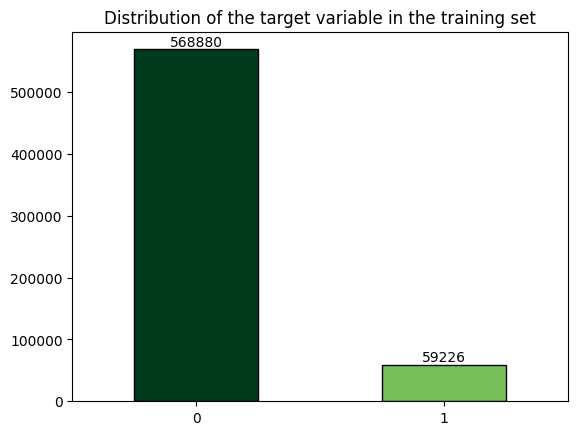

In [53]:
ax = sns.barplot(data = Counter(np.ravel(y_train)),
                 edgecolor = 'black',
                 linewidth = 1,
                 width = 0.5)

for i, bar in enumerate(ax.patches):

    height = bar.get_height()  # Get the bar height (value)
    if height == max(Counter(np.ravel(y_train)).values()):
        bar.set_facecolor('#003b1d')  # Dark green for higher values
    else:
        bar.set_facecolor('#77c057')  # Light green for lower values

ax.set_title('Distribution of the target variable in the training set')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

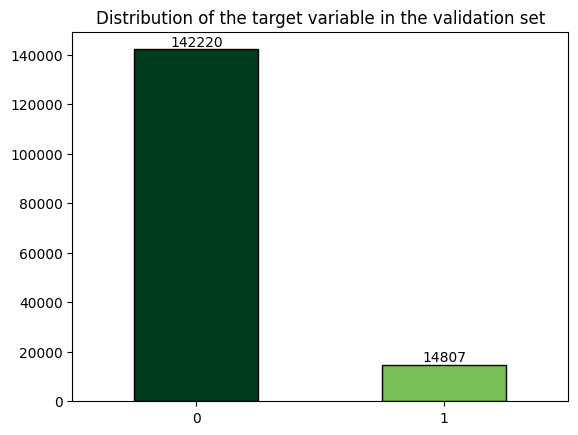

In [54]:
ax = sns.barplot(data = Counter(y_val_ravel), 
                 edgecolor = 'black', 
                 linewidth = 1,
                 width = 0.5)

for i, bar in enumerate(ax.patches):

    height = bar.get_height()  # Get the bar height (value)
    if height == max(Counter(np.ravel(y_val_ravel)).values()):
        bar.set_facecolor('#003b1d')  # Dark green for higher values
    else:
        bar.set_facecolor('#77c057')  # Light green for lower values

ax.set_title('Distribution of the target variable in the validation set')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

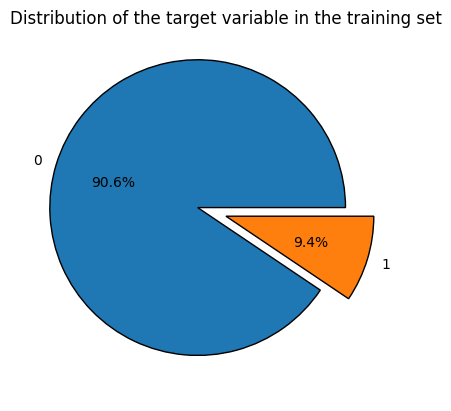

In [55]:
plt.pie(x = Counter(np.ravel(y_train)).values(), 
        labels = Counter(np.ravel(y_train)).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%',
        wedgeprops = {
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the training set')
plt.show()

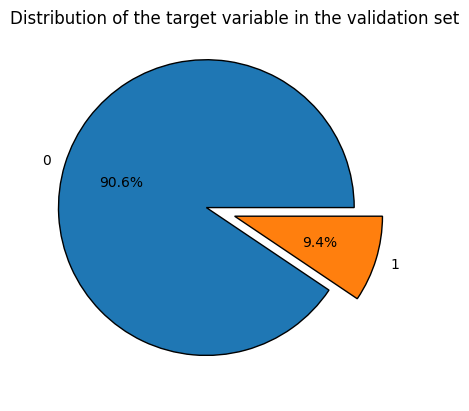

In [56]:
plt.pie(x = Counter(y_val_ravel).values(), 
        labels = Counter(y_val_ravel).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%',
        wedgeprops={
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the validation set')
plt.show()

In [57]:
smote = SMOTE(random_state = seed,
              sampling_strategy='minority')

In [58]:
model_smote = []
k_neighbors = []
f1_score_smote = []

In [59]:
f1_XGB = []
smote_neighbors_XGB = []

x_train_imp = imputer_xgb.fit_transform(x_train)
x_val_imp = imputer_xgb.transform(x_val)

for num in np.linspace(1, 100, 11, dtype = int):
    
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, y_train_ravel)
    
    model_XGB.fit(x_train_upsampled, y_train_upsampled)
    model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

    XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

    f1_XGB.append(XGB_upsample_f1)
    smote_neighbors_XGB.append(num)

In [60]:
max_score_neighbors = max(sorted(list(zip(f1_XGB, smote_neighbors_XGB))))[1]
print('K value for maximum F1 score: ', max_score_neighbors)

K value for maximum F1 score:  1


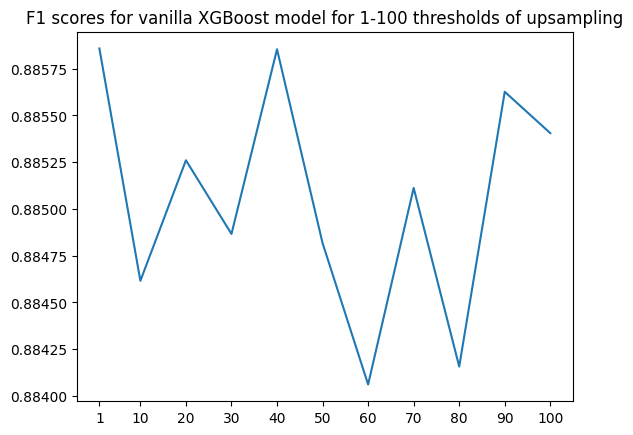

In [61]:
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla XGBoost model for 1-100 thresholds of upsampling')

plt.show()

Expanding the search space around the maximum score, we get

In [63]:
f1_XGB = []
smote_neighbors_XGB = []
if max_score_neighbors == 1:

    for num in range(1, 11):
        smote.set_params(k_neighbors = num)
        
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, y_train_ravel)

        model_XGB.fit(x_train_upsampled, y_train_upsampled)
        model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

        XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

        f1_XGB.append(XGB_upsample_f1)
        smote_neighbors_XGB.append(num)

else:
    for num in range(max_score_neighbors - 5, max_score_neighbors + 6):
        smote.set_params(k_neighbors = num)
        
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, y_train_ravel)

        model_XGB.fit(x_train_upsampled, y_train_upsampled)
        model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

        XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

        f1_XGB.append(XGB_upsample_f1)
        smote_neighbors_XGB.append(num)

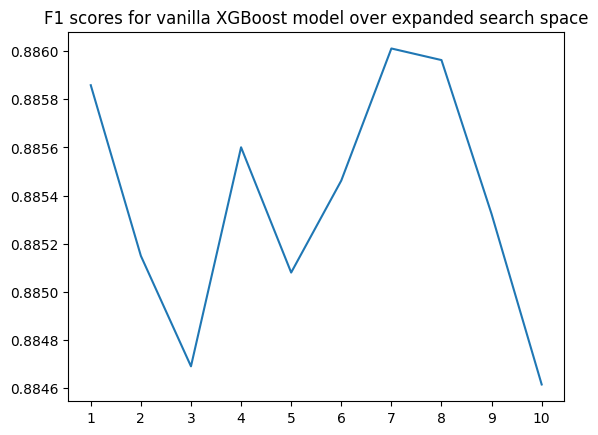

In [64]:
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)

if max_score_neighbors == 1:
    ax.set_xticks(range(1, 11))
else:
    ax.set_xticks(range(max_score_neighbors - 5, max_score_neighbors + 6))
ax.set_title('F1 scores for vanilla XGBoost model over expanded search space')

plt.show()

In [65]:
max_score = max(sorted(zip(f1_XGB, smote_neighbors_XGB)))
max_score

(0.8860111809481697, 7)

In [66]:
model_smote.append('XGBoost')
k_neighbors.append(max_score[1])
f1_score_smote.append(max_score[0])

In [67]:
f1_LGBM = []
smote_neighbors_LGBM = []

x_train_imp = imputer_lgbm.fit_transform(x_train)
x_val_imp = imputer_lgbm.transform(x_val)

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, y_train_ravel)

    model_LGBM.fit(x_train_upsampled, y_train_upsampled)
    model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

    LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

    f1_LGBM.append(LGBM_upsample_f1)
    smote_neighbors_LGBM.append(num)

In [68]:
max_score_neighbors = max(sorted(list(zip(f1_LGBM, smote_neighbors_LGBM))))[1]
print('K value for maximum F1 score: ', max_score_neighbors)

K value for maximum F1 score:  1


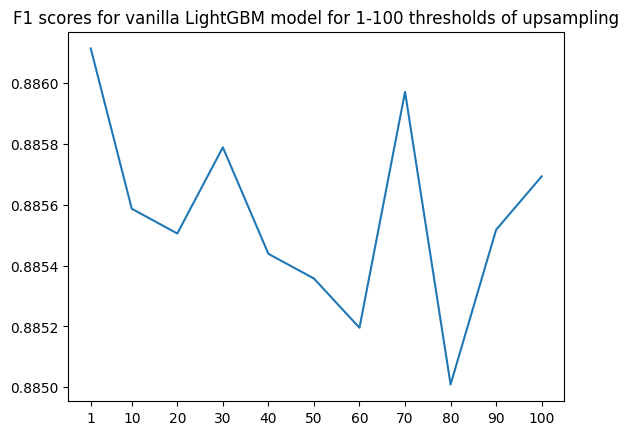

In [69]:
ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla LightGBM model for 1-100 thresholds of upsampling')

plt.show()

Expanding the search space around the max score, we get:

In [70]:
f1_LGBM = []
smote_neighbors_LGBM = []

if max_score_neighbors == 1:

    for num in range(1, 11):
        smote.set_params(k_neighbors = num)
        
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, y_train_ravel)

        model_LGBM.fit(x_train_upsampled, y_train_upsampled)
        model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

        LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

        f1_LGBM.append(LGBM_upsample_f1)
        smote_neighbors_LGBM.append(num)

else:

    for num in range(max_score_neighbors - 5, max_score_neighbors + 6):
        smote.set_params(k_neighbors = num)
        
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, y_train_ravel)

        model_LGBM.fit(x_train_upsampled, y_train_upsampled)
        model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

        LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

        f1_LGBM.append(LGBM_upsample_f1)
        smote_neighbors_LGBM.append(num)

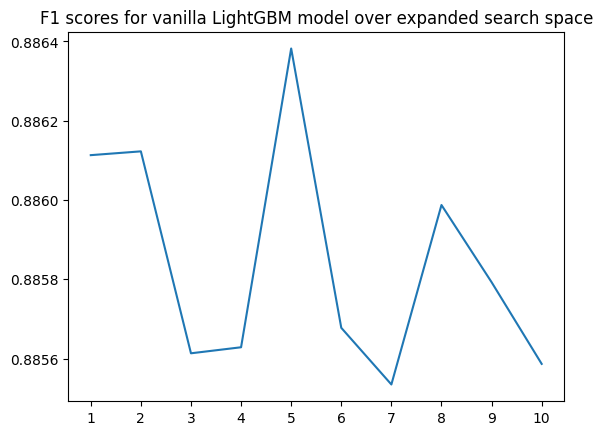

In [71]:
ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
if max_score_neighbors == 1:
    ax.set_xticks(range(1, 11))
else:
    ax.set_xticks(range(max_score_neighbors - 5, max_score_neighbors + 6))
ax.set_title('F1 scores for vanilla LightGBM model over expanded search space')

plt.show()

In [72]:
max_score = max(sorted(zip(f1_LGBM, smote_neighbors_LGBM)))
max_score

(0.8863821011186801, 5)

In [73]:
model_smote.append('LightGBM')
k_neighbors.append(max_score[1])
f1_score_smote.append(max_score[0])

In [74]:
smote_f1_scores = pd.DataFrame({
    'Model': model_smote,
    'Neighbors': k_neighbors,
    'F1 Score': f1_score_smote
})

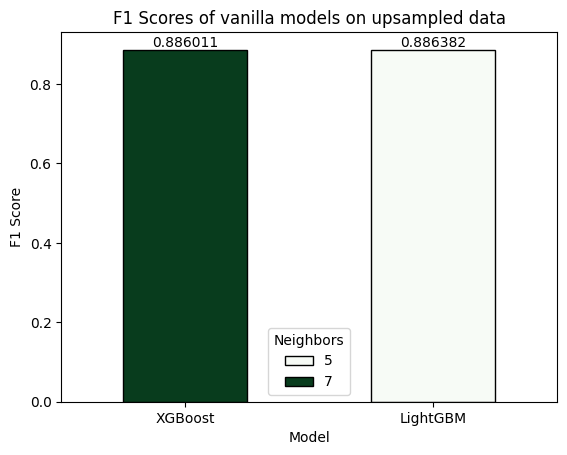

In [75]:
ax = sns.barplot(y = smote_f1_scores['F1 Score'], 
                 x = smote_f1_scores['Model'], 
                 hue = smote_f1_scores['Neighbors'],
                 edgecolor = 'black',
                 linewidth = 1,
                 palette = 'Greens', 
                 width = 0.5)

ax.set_title('F1 Scores of vanilla models on upsampled data')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

We are getting good F1 scores for both base models.

In [76]:
smote_xgb = SMOTE(k_neighbors = smote_f1_scores['Neighbors'][0],
                  sampling_strategy = 'minority',
                  random_state = seed)

smote_lgbm = SMOTE(k_neighbors = smote_f1_scores['Neighbors'][1],
                  sampling_strategy = 'minority',
                  random_state = seed)

In [77]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['XGBoost' ,'LightGBM']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [78]:
for model_name in model_list:
    
    model_list1.append(model_name)

    if model_name == 'XGBoost':

        x_train_upsampled_XGB, y_train_upsampled_XGB = smote_xgb.fit_resample(x_train_imp, y_train_ravel)

        model_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)
        model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

        XGB_upsampled_accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_upsample_pred)
        accuracy_list.append(XGB_upsampled_accuracy)

        XGB_upsampled_precision = metrics.precision_score(y_val_ravel, model_XGB_upsample_pred)
        precision_list.append(XGB_upsampled_precision)

        XGB_upsampled_recall = metrics.recall_score(y_val_ravel, model_XGB_upsample_pred)
        recall_list.append(XGB_upsampled_recall)

        XGB_upsampled_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)
        f1_list.append(XGB_upsampled_f1)

        XGB_upsampled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_XGB_upsample_pred)
        auc_roc_list.append(XGB_upsampled_roc_auc)

        XGB_upsampled_log_loss = metrics.log_loss(y_val_ravel, model_XGB_upsample_pred)
        log_loss_list.append(XGB_upsampled_log_loss)

        XGB_upsampled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_upsample_pred)
        balanced_accuracy_list.append(XGB_upsampled_balanced_accuracy)


    elif model_name == 'LightGBM':

        x_train_upsampled_LGBM, y_train_upsampled_LGBM = smote_lgbm.fit_resample(x_train_imp, y_train_ravel)
        
        model_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
        model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

        LGBM_upsampled_accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_upsample_pred)
        accuracy_list.append(LGBM_upsampled_accuracy)

        LGBM_upsampled_precision = metrics.precision_score(y_val_ravel, model_LGBM_upsample_pred)
        precision_list.append(LGBM_upsampled_precision)

        LGBM_upsampled_recall = metrics.recall_score(y_val_ravel, model_LGBM_upsample_pred)
        recall_list.append(LGBM_upsampled_recall)

        LGBM_upsampled_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)
        f1_list.append(LGBM_upsampled_f1)

        LGBM_upsampled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_LGBM_upsample_pred)
        auc_roc_list.append(LGBM_upsampled_roc_auc)

        LGBM_upsampled_log_loss = metrics.log_loss(y_val_ravel, model_LGBM_upsample_pred)
        log_loss_list.append(LGBM_upsampled_log_loss)

        LGBM_upsampled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_upsample_pred)
        balanced_accuracy_list.append(LGBM_upsampled_balanced_accuracy)

In [79]:
model_scores_upsampled = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [80]:
model_scores_upsampled

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977010,0.831645,0.948133,0.886077,0.964075,0.828632,0.964075
1,LightGBM,0.976845,0.824833,0.957858,0.886382,0.968340,0.834600,0.968340


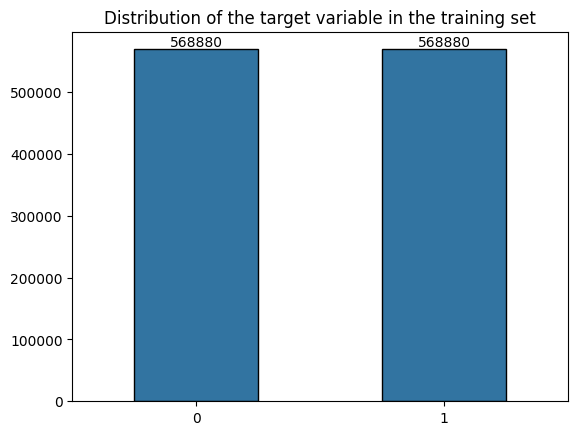

In [81]:
ax = sns.barplot(data = Counter(y_train_upsampled),
                 edgecolor = 'black',
                 linewidth = 1,
                 width = 0.5)

ax.set_title('Distribution of the target variable in the training set')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

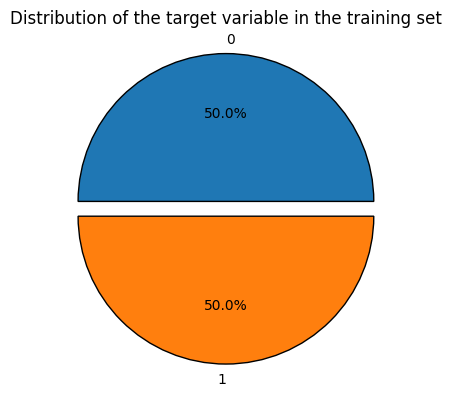

In [82]:
plt.pie(x = Counter(y_train_upsampled).values(), 
        labels = Counter(y_train_upsampled).keys(), 
        normalize = True, 
        explode = [0.1, 0],
        autopct='%1.1f%%',
        wedgeprops = {
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the training set')
plt.show()

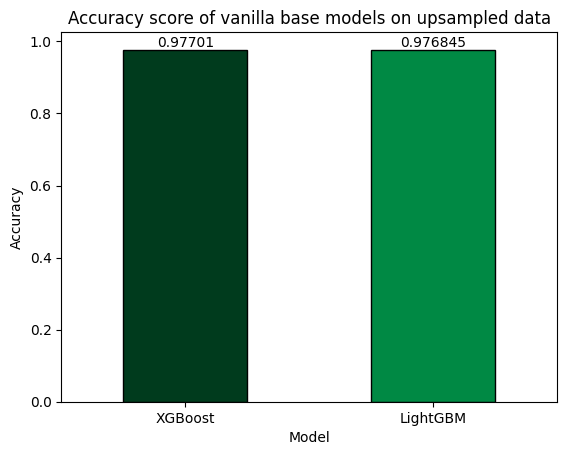

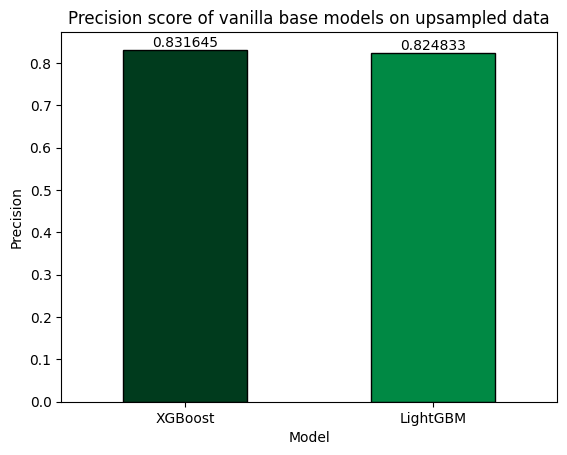

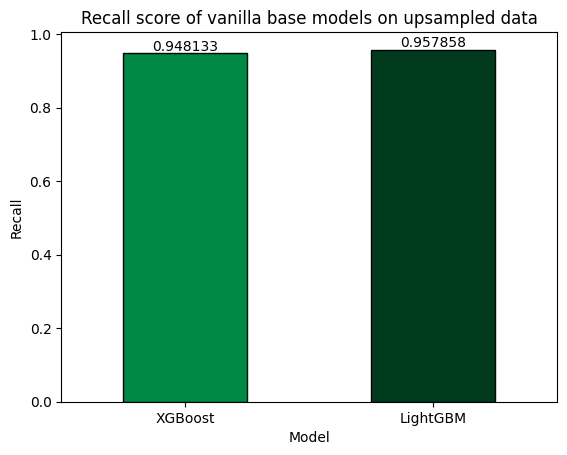

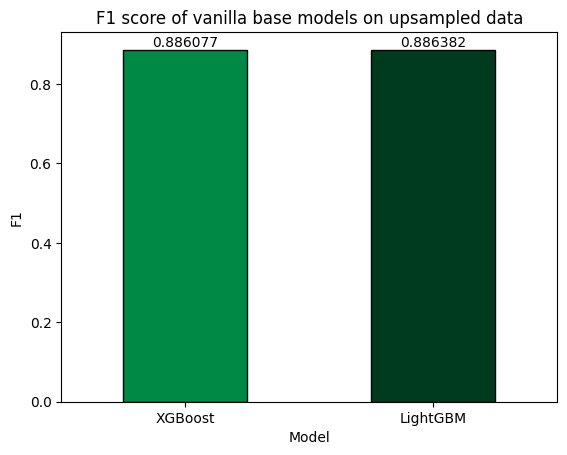

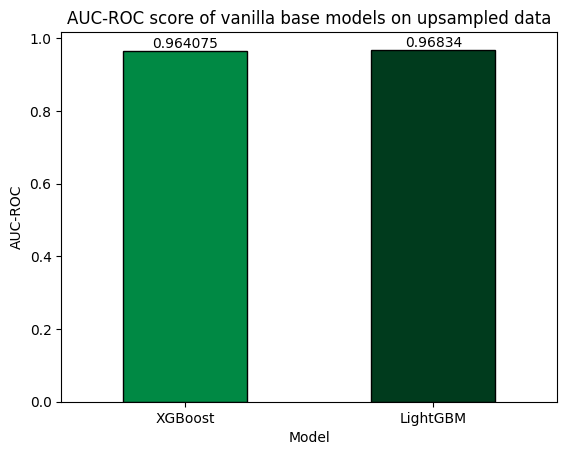

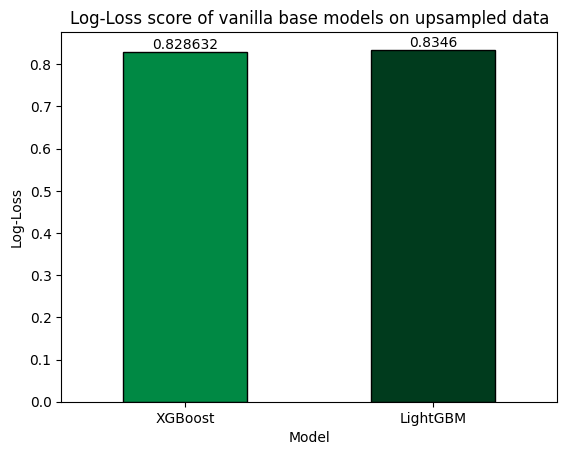

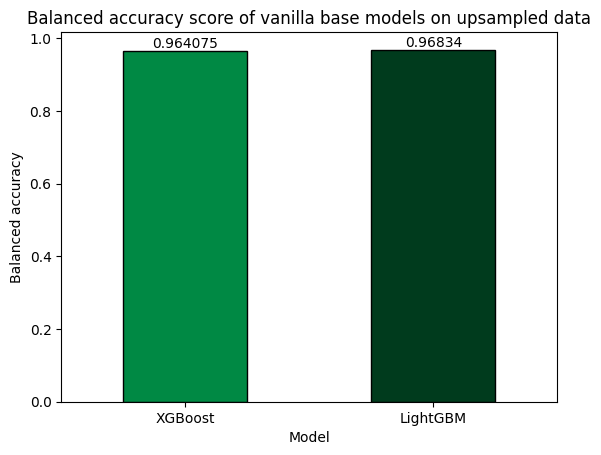

In [83]:
for col in model_scores_upsampled.columns[1:]:
    
    ax = sns.barplot(data=model_scores_upsampled, 
                     x = 'Model', 
                     y = col, 
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1,
                     legend = False,
                     palette = 'Greens',
                     width = 0.5)
    
    for i, bar in enumerate(ax.patches):
        
        height = bar.get_height()  # Get the bar height (value)
        if height == max(model_scores_upsampled[col]):
            bar.set_facecolor('#003b1d')  # Dark green for higher values
        else:
            bar.set_facecolor('#008944')  # Light green for lower values

    ax.set_title(f'{col} score of vanilla base models on upsampled data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    
    plt.show()

## Model Building and Optimization

In [84]:
smote_f1_scores

,Model,Neighbors,F1 Score
0,XGBoost,7,0.886011
1,LightGBM,5,0.886382


In [85]:
model_scores_upsampled

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977010,0.831645,0.948133,0.886077,0.964075,0.828632,0.964075
1,LightGBM,0.976845,0.824833,0.957858,0.886382,0.968340,0.834600,0.968340


## Hyperparameter Tuning

In [86]:
os.makedirs('models', exist_ok=True)

In [87]:
def objective(trial):
    params_XGB = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'eta': trial.suggest_float('eta', 1e-2, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),        
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 5, 20),
    }

    optuna_XGB = XGBClassifier(**params_XGB, 
                                random_state = seed, 
                                n_jobs = -1)
    
    optuna_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)
    optuna_XGB_pred = optuna_XGB.predict(x_val_imp)

    score_optuna_XGB_F1 = metrics.f1_score(y_val_ravel, optuna_XGB_pred)

    return score_optuna_XGB_F1

In [88]:
sampler = optuna.samplers.TPESampler(seed = seed)

study = optuna.create_study(direction = 'maximize', 
                            sampler = sampler)

study.optimize(objective,
               n_trials = 50,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [89]:
print('F1 score for optimized XGBoost Classifier:', study.best_value)

F1 score for optimized XGBoost Classifier: 0.8883553421368547


In [90]:
print('Parameters for optimized XGBoost Classifier:')
print(study.best_params)

Parameters for optimized XGBoost Classifier:
{'n_estimators': 627, 'eta': 0.06781111903209494, 'max_depth': 10, 'subsample': 0.5952689590368393, 'colsample_bytree': 0.835852620243264, 'gamma': 3.4203553588496964, 'reg_lambda': 5.694878877868204, 'reg_alpha': 1.594503895747747}


In [91]:
tuned_XGB = XGBClassifier(**study.best_params, 
                          random_state = seed, 
                          n_jobs = -1)

tuned_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)

tuned_XGB_pred = tuned_XGB.predict(x_val_imp)

In [92]:
joblib.dump(tuned_XGB, 'models/XGBoostClassifier')

['models/XGBoostClassifier']

In [93]:
def objective(trial):
    params_lgbm = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-2, 0.3, log = True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
    }

    optuna_LGBM = LGBMClassifier(**params_lgbm, 
                                 random_state = seed, 
                                 n_jobs = -1, 
                                 verbosity = 0)

    optuna_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
    optuna_LGBM_pred = optuna_LGBM.predict(x_val_imp)

    score_optuna_LGBM_F1 = metrics.f1_score(y_val_ravel, optuna_LGBM_pred)

    return score_optuna_LGBM_F1

In [94]:
sampler = optuna.samplers.TPESampler(seed = seed)

study = optuna.create_study(direction = 'maximize', 
                            sampler = sampler)

study.optimize(objective,
               n_trials = 50,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [95]:
print('F1 score for optimized LightGBM Classifier:', study.best_value)

F1 score for optimized LightGBM Classifier: 0.8875994800088779


In [96]:
print('Parameters for optimized LightGBM Classifier:')
print(study.best_params)

Parameters for optimized LightGBM Classifier:
{'n_estimators': 988, 'learning_rate': 0.018784090714094724, 'max_depth': 9, 'num_leaves': 104, 'min_child_samples': 48, 'subsample': 0.7130590132388671, 'reg_lambda': 6.380116750488502, 'reg_alpha': 5.785000479846642}


In [97]:
tuned_LGBM = LGBMClassifier(**study.best_params, 
                            random_state = seed, 
                            n_jobs = -1, 
                            verbosity = -1)

tuned_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
tuned_LGBM_pred = tuned_LGBM.predict(x_val_imp)

In [98]:
joblib.dump(tuned_LGBM, 'models/LightGBMClassifier')

['models/LightGBMClassifier']

In [99]:
base_model_xgb = make_pipeline(
    imputer_xgb,
    smote_xgb,
    tuned_XGB
)

base_model_lgbm = make_pipeline(
    imputer_lgbm,
    smote_lgbm,
    tuned_LGBM
)

meta_model = RandomForestClassifier(random_state = seed, 
                                    n_jobs = -1,
                                    oob_score = True)

In [100]:
estimator_list = [
    ('XGBoost', tuned_XGB),
    ('LightGBM', tuned_LGBM)
]

In [101]:
vote_clf = VotingClassifier(estimators = estimator_list,
                            voting = 'soft',
                            n_jobs = -1)

vote_clf.fit(x_train, y_train_ravel)
vote_clf_pred = vote_clf.predict(x_val)

In [102]:
metrics.f1_score(y_val_ravel, vote_clf_pred)

0.8906671808715774

In [103]:
joblib.dump(tuned_LGBM, 'models/VotingClassifier')

['models/VotingClassifier']

In [104]:
stack_clf = StackingClassifier(estimators=estimator_list,
                               final_estimator=RandomForestClassifier(random_state = seed, 
                                                                      n_jobs = -1))

stack_clf.fit(x_train, y_train_ravel)

StackingClassifier(estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.835852620243264,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eta=0.06781111903209494,
                                              eval_metric=None,
                                              feature_types=None,
                                              gamma=3.4203553588496964,
                                              grow_policy=None,
                                              impo...
                                              n_estimators=627, n_jobs=-1,
                                              num_parallel_tree=None, ...)),
                               ('LightGBM',
                                LGBMClassifier(learning_rate=0.018784090714094724,
                                               max_depth=9,
                                               min_child_samples=48,
                                               n_estimators=988, n_jobs=-1,
                                               num_leaves=104, random_state=0,
                                               reg_alpha=5.785000479846642,
                                               reg_lambda=6.380116750488502,
                                               subsample=0.7130590132388671,
                                               verbosity=-1))],
                   final_estimator=RandomForestClassifier(n_jobs=-1,
                                                          random_state=0))

In [105]:
stack_clf_pred = stack_clf.predict(x_val)
print(metrics.f1_score(y_val_ravel, stack_clf_pred))

0.8739830757669814


In [106]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['XGBoost' ,'LightGBM', 'VotingClassifier', 'StackingClassifier']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [107]:
for model_name in model_list:
    
    model_list1.append(model_name)

    if model_name == 'XGBoost':

        tuned_XGB_upsample_pred = tuned_XGB.predict(x_val_imp)

        XGB_tuned_accuracy = metrics.accuracy_score(y_val_ravel, tuned_XGB_upsample_pred)
        accuracy_list.append(XGB_tuned_accuracy)

        XGB_tuned_precision = metrics.precision_score(y_val_ravel, tuned_XGB_upsample_pred)
        precision_list.append(XGB_tuned_precision)

        XGB_tuned_recall = metrics.recall_score(y_val_ravel, tuned_XGB_upsample_pred)
        recall_list.append(XGB_tuned_recall)

        XGB_tuned_f1 = metrics.f1_score(y_val_ravel, tuned_XGB_upsample_pred)
        f1_list.append(XGB_tuned_f1)

        XGB_tuned_roc_auc = metrics.roc_auc_score(y_val_ravel, tuned_XGB_upsample_pred)
        auc_roc_list.append(XGB_tuned_roc_auc)

        XGB_tuned_log_loss = metrics.log_loss(y_val_ravel, tuned_XGB_upsample_pred)
        log_loss_list.append(XGB_tuned_log_loss)

        XGB_tuned_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, tuned_XGB_upsample_pred)
        balanced_accuracy_list.append(XGB_tuned_balanced_accuracy)


    elif model_name == 'LightGBM':

        tuned_LGBM_upsample_pred = tuned_LGBM.predict(x_val_imp)

        LGBM_tuned_accuracy = metrics.accuracy_score(y_val_ravel, tuned_LGBM_upsample_pred)
        accuracy_list.append(LGBM_tuned_accuracy)

        LGBM_tuned_precision = metrics.precision_score(y_val_ravel, tuned_LGBM_upsample_pred)
        precision_list.append(LGBM_tuned_precision)

        LGBM_tuned_recall = metrics.recall_score(y_val_ravel, tuned_LGBM_upsample_pred)
        recall_list.append(LGBM_tuned_recall)

        LGBM_tuned_f1 = metrics.f1_score(y_val_ravel, tuned_LGBM_upsample_pred)
        f1_list.append(LGBM_tuned_f1)

        LGBM_tuned_roc_auc = metrics.roc_auc_score(y_val_ravel, tuned_LGBM_upsample_pred)
        auc_roc_list.append(LGBM_tuned_roc_auc)

        LGBM_tuned_log_loss = metrics.log_loss(y_val_ravel, tuned_LGBM_upsample_pred)
        log_loss_list.append(LGBM_tuned_log_loss)

        LGBM_tuned_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, tuned_LGBM_upsample_pred)
        balanced_accuracy_list.append(LGBM_tuned_balanced_accuracy)

        
    elif model_name == 'VotingClassifier':

        vote_clf_pred = vote_clf.predict(x_val)

        vote_clf_accuracy = metrics.accuracy_score(y_val_ravel, vote_clf_pred)
        accuracy_list.append(vote_clf_accuracy)

        vote_clf_precision = metrics.precision_score(y_val_ravel, vote_clf_pred)
        precision_list.append(vote_clf_precision)

        vote_clf_recall = metrics.recall_score(y_val_ravel, vote_clf_pred)
        recall_list.append(vote_clf_recall)

        vote_clf_f1 = metrics.f1_score(y_val_ravel, vote_clf_pred)
        f1_list.append(vote_clf_f1)

        vote_clf_roc_auc = metrics.roc_auc_score(y_val_ravel, vote_clf_pred)
        auc_roc_list.append(vote_clf_roc_auc)

        vote_clf_log_loss = metrics.log_loss(y_val_ravel, vote_clf_pred)
        log_loss_list.append(vote_clf_log_loss)

        vote_clf_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, vote_clf_pred)
        balanced_accuracy_list.append(vote_clf_balanced_accuracy)

    elif model_name == 'StackingClassifier':

        stack_clf_pred = stack_clf.predict(x_val)

        stack_clf_accuracy = metrics.accuracy_score(y_val_ravel, stack_clf_pred)
        accuracy_list.append(stack_clf_accuracy)

        stack_clf_precision = metrics.precision_score(y_val_ravel, stack_clf_pred)
        precision_list.append(stack_clf_precision)

        stack_clf_recall = metrics.recall_score(y_val_ravel, stack_clf_pred)
        recall_list.append(stack_clf_recall)

        stack_clf_f1 = metrics.f1_score(y_val_ravel, stack_clf_pred)
        f1_list.append(stack_clf_f1)

        stack_clf_roc_auc = metrics.roc_auc_score(y_val_ravel, stack_clf_pred)
        auc_roc_list.append(stack_clf_roc_auc)

        stack_clf_log_loss = metrics.log_loss(y_val_ravel, stack_clf_pred)
        log_loss_list.append(stack_clf_log_loss)

        stack_clf_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, stack_clf_pred)
        balanced_accuracy_list.append(stack_clf_balanced_accuracy)

In [108]:
model_scores_tuned = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [109]:
model_scores_tuned

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977494,0.834570,0.949551,0.888355,0.964977,0.811187,0.964977
1,LightGBM,0.977424,0.836541,0.945296,0.887599,0.963033,0.813712,0.963033
2,VotingClassifier,0.978335,0.849654,0.935841,0.890667,0.959300,0.780888,0.959300
3,StackingClassifier,0.975437,0.846519,0.903289,0.873983,0.943119,0.885328,0.943119


Stacking classifier performs poorly on all metrics.

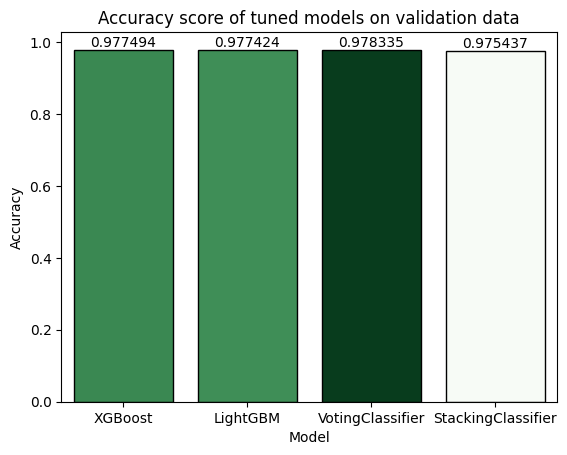

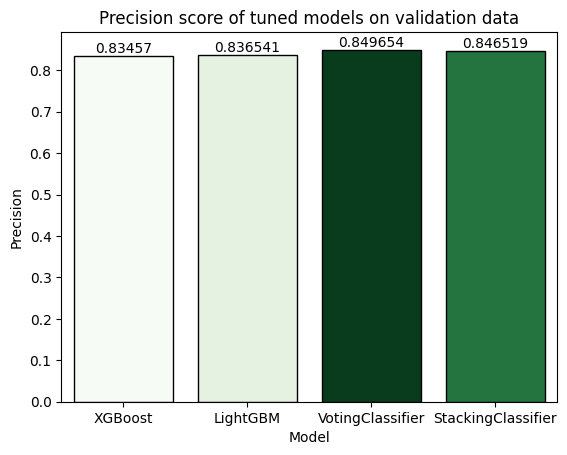

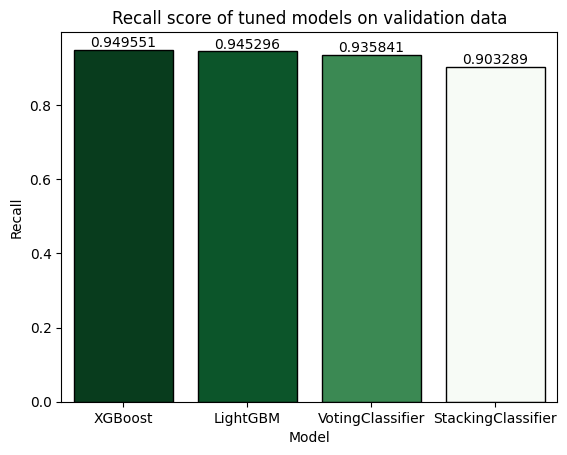

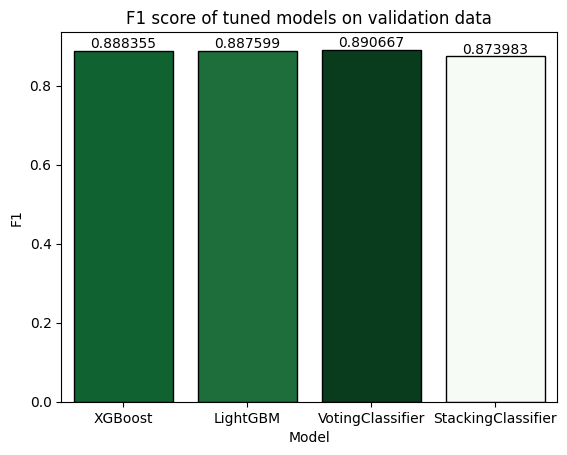

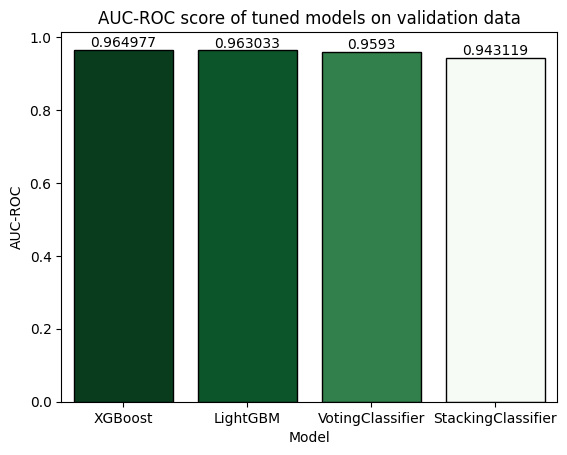

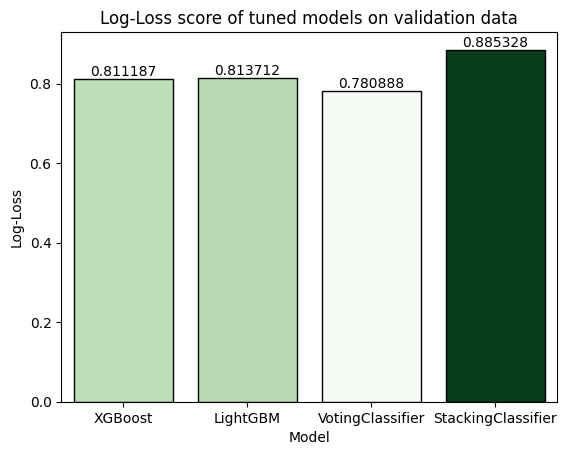

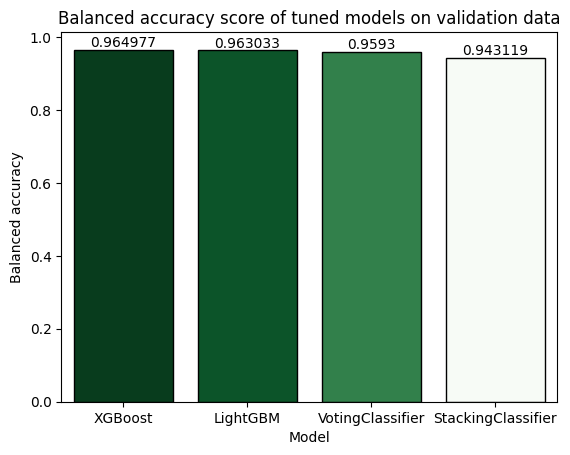

In [110]:
for col in model_scores_tuned.columns[1:]:

    ax = sns.barplot(data=model_scores_tuned, 
                     x = 'Model', 
                     y = col, 
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1,
                     legend = False,
                     palette='Greens')
    
    ax.set_title(f'{col} score of tuned models on validation data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.bar_label(ax.containers[3])
    
    plt.show()

In [111]:
xgb_data_preprocess_pipeline = make_pipeline(
    imputer_xgb,
    tuned_XGB

)
lgbm_data_preprocess_pipeline = make_pipeline(
    imputer_lgbm,
    tuned_LGBM
)

data_preprocess_pipeline = make_pipeline(
    xgb_data_preprocess_pipeline,
    lgbm_data_preprocess_pipeline
)

In [113]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['XGBoost' ,'LightGBM', 'VotingClassifier', 'StackingClassifier']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [114]:
for model_name in model_list:
    
    model_list1.append(model_name)

    if model_name == 'XGBoost':

        XGB_test_pred = xgb_data_preprocess_pipeline.predict(xtest)

        XGB_test_accuracy = metrics.accuracy_score(np.ravel(ytest), XGB_test_pred)
        accuracy_list.append(XGB_test_accuracy)

        XGB_test_precision = metrics.precision_score(np.ravel(ytest), XGB_test_pred)
        precision_list.append(XGB_test_precision)

        XGB_test_recall = metrics.recall_score(np.ravel(ytest), XGB_test_pred)
        recall_list.append(XGB_test_recall)

        XGB_test_f1 = metrics.f1_score(np.ravel(ytest), XGB_test_pred)
        f1_list.append(XGB_test_f1)

        XGB_test_roc_auc = metrics.roc_auc_score(np.ravel(ytest), xgb_data_preprocess_pipeline.predict_proba(xtest)[:, 1])
        auc_roc_list.append(XGB_test_roc_auc)

        XGB_test_log_loss = metrics.log_loss(np.ravel(ytest), XGB_test_pred)
        log_loss_list.append(XGB_test_log_loss)

        XGB_test_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), XGB_test_pred)
        balanced_accuracy_list.append(XGB_test_balanced_accuracy)


    elif model_name == 'LightGBM':

        LGBM_test_pred = lgbm_data_preprocess_pipeline.predict(xtest)

        LGBM_tuned_accuracy = metrics.accuracy_score(np.ravel(ytest), LGBM_test_pred)
        accuracy_list.append(LGBM_tuned_accuracy)

        LGBM_tuned_precision = metrics.precision_score(np.ravel(ytest), LGBM_test_pred)
        precision_list.append(LGBM_tuned_precision)

        LGBM_tuned_recall = metrics.recall_score(np.ravel(ytest), LGBM_test_pred)
        recall_list.append(LGBM_tuned_recall)

        LGBM_tuned_f1 = metrics.f1_score(np.ravel(ytest), LGBM_test_pred)
        f1_list.append(LGBM_tuned_f1)

        LGBM_tuned_roc_auc = metrics.roc_auc_score(np.ravel(ytest), lgbm_data_preprocess_pipeline.predict_proba(xtest)[:, 1])
        auc_roc_list.append(LGBM_tuned_roc_auc)

        LGBM_tuned_log_loss = metrics.log_loss(np.ravel(ytest), LGBM_test_pred)
        log_loss_list.append(LGBM_tuned_log_loss)

        LGBM_tuned_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), LGBM_test_pred)
        balanced_accuracy_list.append(LGBM_tuned_balanced_accuracy)

        
    elif model_name == 'VotingClassifier':

        vote_clf_pred = vote_clf.predict(xtest)

        vote_clf_accuracy = metrics.accuracy_score(np.ravel(ytest), vote_clf_pred)
        accuracy_list.append(vote_clf_accuracy)

        vote_clf_precision = metrics.precision_score(np.ravel(ytest), vote_clf_pred)
        precision_list.append(vote_clf_precision)

        vote_clf_recall = metrics.recall_score(np.ravel(ytest), vote_clf_pred)
        recall_list.append(vote_clf_recall)

        vote_clf_f1 = metrics.f1_score(np.ravel(ytest), vote_clf_pred)
        f1_list.append(vote_clf_f1)

        vote_clf_roc_auc = metrics.roc_auc_score(np.ravel(ytest), vote_clf.predict_proba(xtest)[:, 1])
        auc_roc_list.append(vote_clf_roc_auc)

        vote_clf_log_loss = metrics.log_loss(np.ravel(ytest), vote_clf_pred)
        log_loss_list.append(vote_clf_log_loss)

        vote_clf_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), vote_clf_pred)
        balanced_accuracy_list.append(vote_clf_balanced_accuracy)

    elif model_name == 'StackingClassifier':

        stack_clf_pred = stack_clf.predict(xtest)

        stack_clf_accuracy = metrics.accuracy_score(np.ravel(ytest), stack_clf_pred)
        accuracy_list.append(stack_clf_accuracy)

        stack_clf_precision = metrics.precision_score(np.ravel(ytest), stack_clf_pred)
        precision_list.append(stack_clf_precision)

        stack_clf_recall = metrics.recall_score(np.ravel(ytest), stack_clf_pred)
        recall_list.append(stack_clf_recall)

        stack_clf_f1 = metrics.f1_score(np.ravel(ytest), stack_clf_pred)
        f1_list.append(stack_clf_f1)

        stack_clf_roc_auc = metrics.roc_auc_score(np.ravel(ytest), stack_clf.predict_proba(xtest)[:, 1])
        auc_roc_list.append(stack_clf_roc_auc)

        stack_clf_log_loss = metrics.log_loss(np.ravel(ytest), stack_clf_pred)
        log_loss_list.append(stack_clf_log_loss)

        stack_clf_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), stack_clf_pred)
        balanced_accuracy_list.append(stack_clf_balanced_accuracy)

In [115]:
model_scores_test = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [116]:
model_scores_test

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977116,0.851548,0.917214,0.883162,0.994166,0.824821,0.950283
1,LightGBM,0.977854,0.836602,0.950847,0.890073,0.994671,0.798240,0.965756
2,VotingClassifier,0.978499,0.848856,0.939217,0.891753,0.994981,0.774965,0.960903
3,StackingClassifier,0.975737,0.847595,0.905503,0.875593,0.993060,0.874538,0.944276


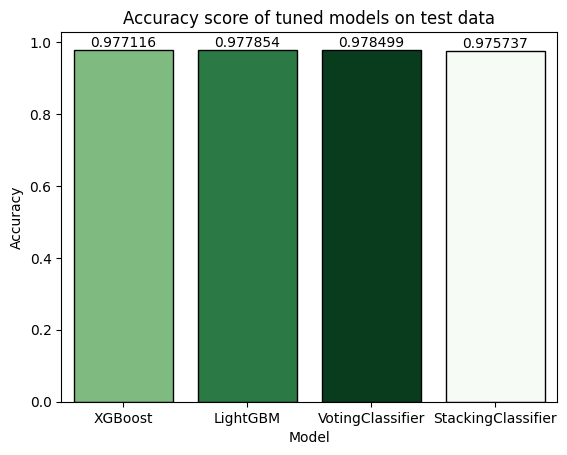

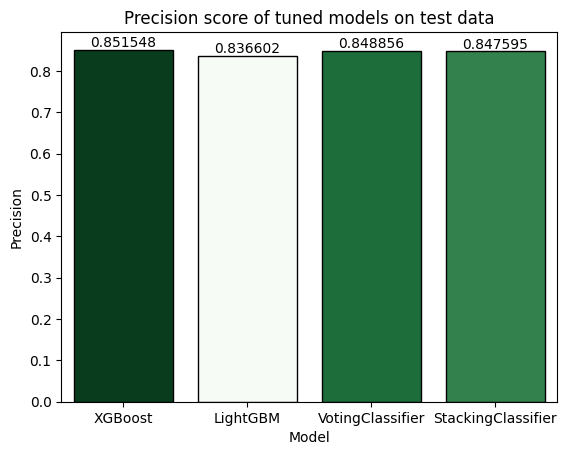

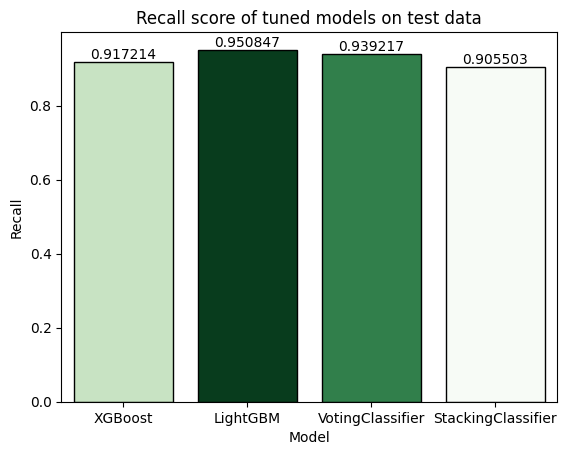

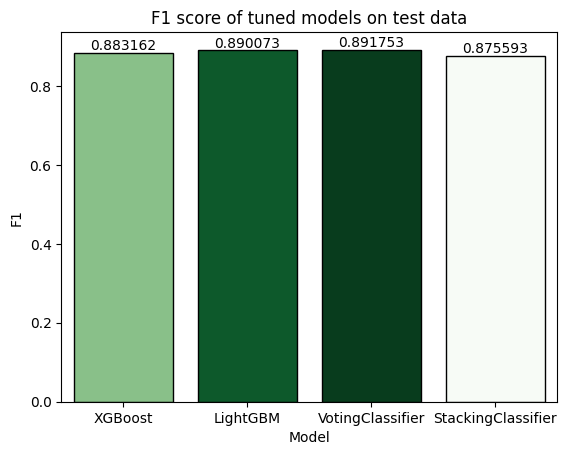

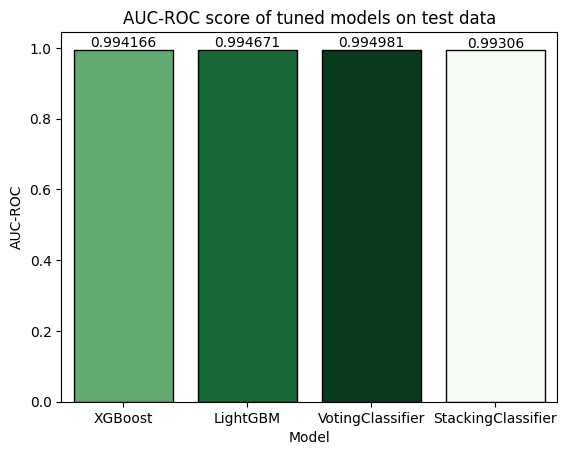

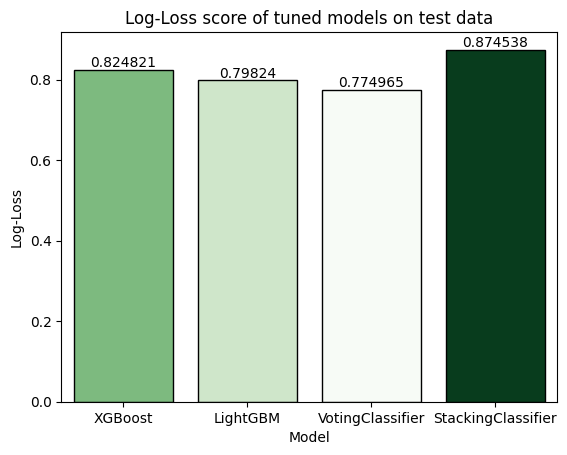

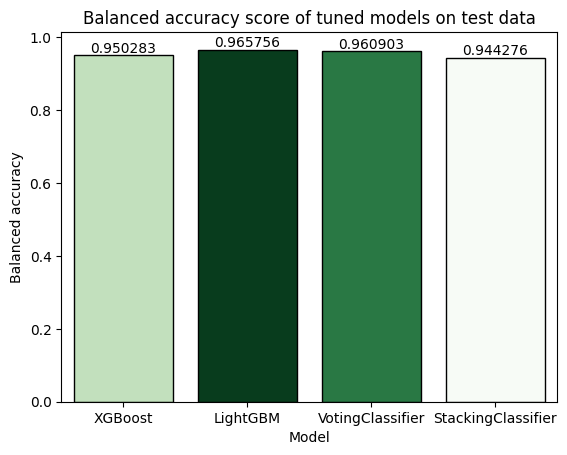

In [117]:
for col in model_scores_test.columns[1:]:

    ax = sns.barplot(data=model_scores_test, 
                     x = 'Model', 
                     y = col, 
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1, 
                     legend = False,
                     palette='Greens')
    
    ax.set_title(f'{col} score of tuned models on test data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.bar_label(ax.containers[3])
    
    plt.show()

Classification report for optimized XGBoost on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.94    261712
weighted avg       0.98      0.98      0.98    261712



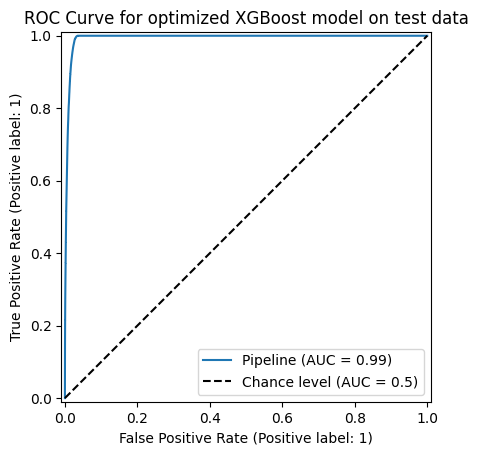

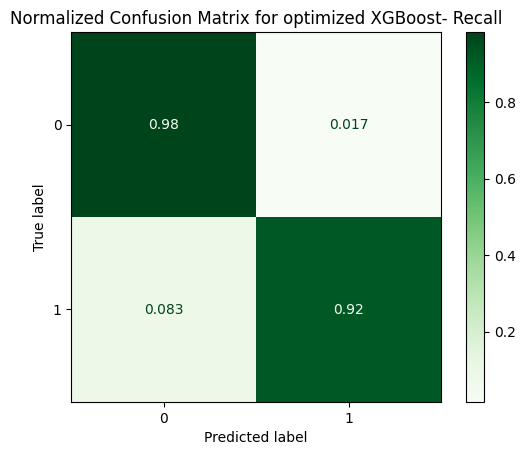

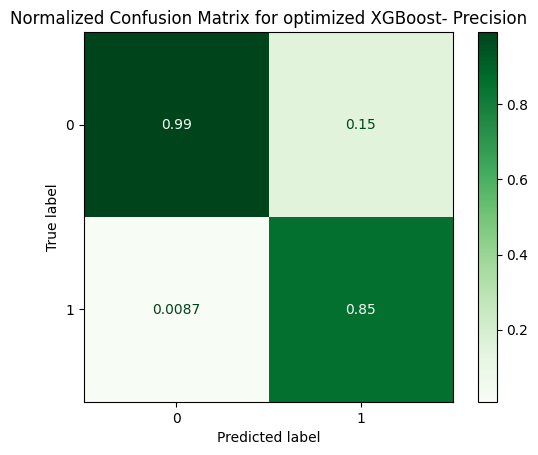

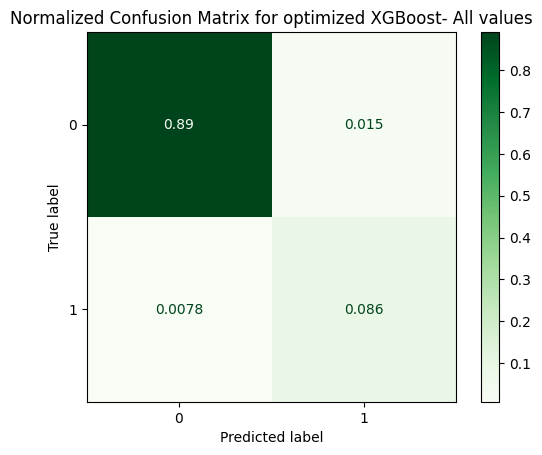

In [118]:
classification_report_XGB = metrics.classification_report(np.ravel(ytest), xgb_data_preprocess_pipeline.predict(xtest))
print("Classification report for optimized XGBoost on test data: \n\n", classification_report_XGB)

roc_curve_test_XGB = metrics.RocCurveDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                        xtest, 
                                                        np.ravel(ytest), 
                                                        plot_chance_level=True)
plt.title('ROC Curve for optimized XGBoost model on test data')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized XGBoost- Recall')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized XGBoost- Precision')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized XGBoost- All values')
plt.show()

Classification report for optimized LightGBM on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.95      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712



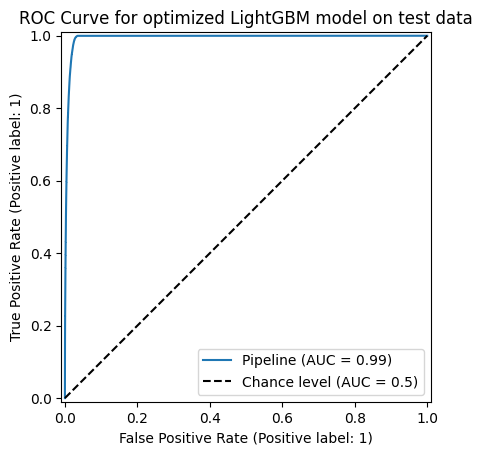

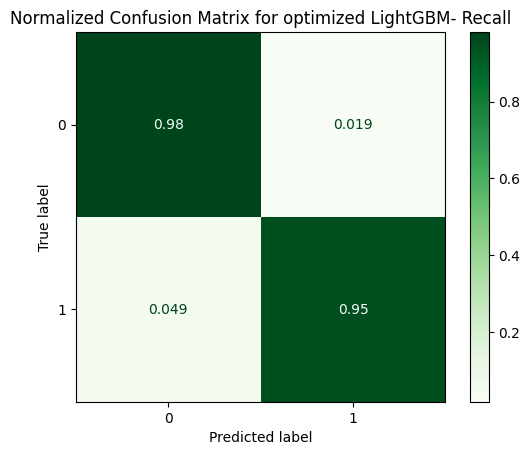

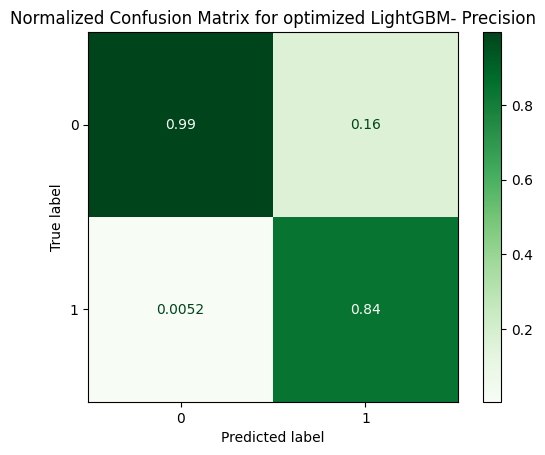

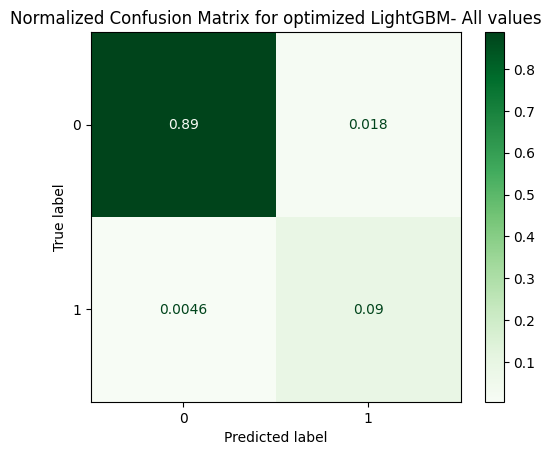

In [119]:
classification_report_LGBM = metrics.classification_report(np.ravel(ytest), lgbm_data_preprocess_pipeline.predict(xtest))
print("Classification report for optimized LightGBM on test data: \n\n", classification_report_LGBM)

roc_curve_test_LGBM = metrics.RocCurveDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                        xtest, 
                                                        np.ravel(ytest), 
                                                        plot_chance_level=True)
plt.title('ROC Curve for optimized LightGBM model on test data')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized LightGBM- Recall')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized LightGBM- Precision')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized LightGBM- All values')
plt.show()

Classification report for Voting Classifier on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



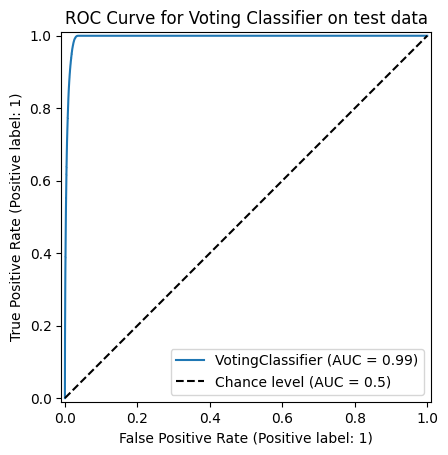

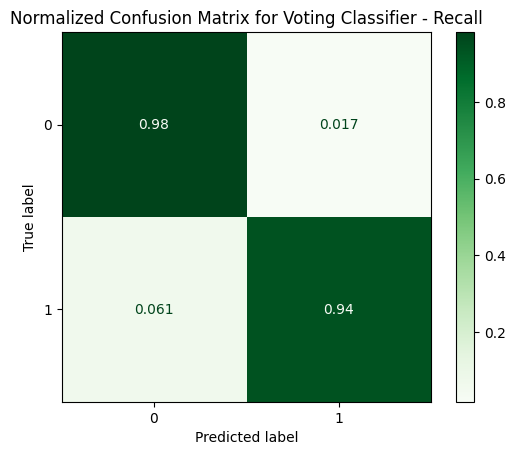

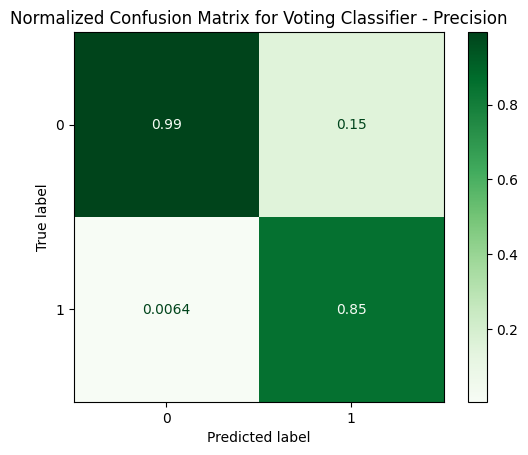

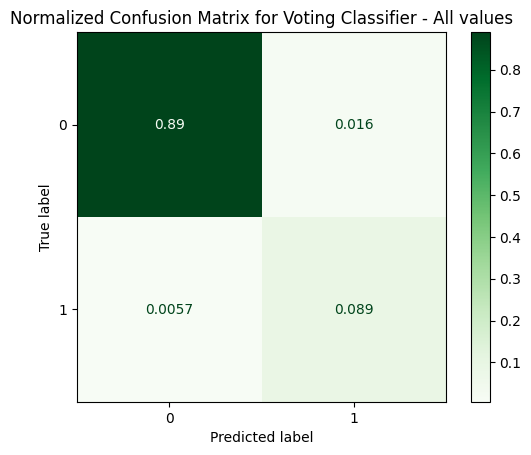

In [120]:
classification_report_vote_clf = metrics.classification_report(np.ravel(ytest), 
                                                               vote_clf.predict(xtest))

print("Classification report for Voting Classifier on test data: \n\n", classification_report_vote_clf)

roc_curve_test_vote_clf = metrics.RocCurveDisplay.from_estimator(vote_clf, 
                                                                 xtest, 
                                                                 np.ravel(ytest), 
                                                                 plot_chance_level=True)
plt.title('ROC Curve for Voting Classifier on test data')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(vote_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Voting Classifier - Recall')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(vote_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Voting Classifier - Precision')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(vote_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Voting Classifier - All values')
plt.show()

Classification report for Stacking Classifier on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.91      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.94      0.93    261712
weighted avg       0.98      0.98      0.98    261712



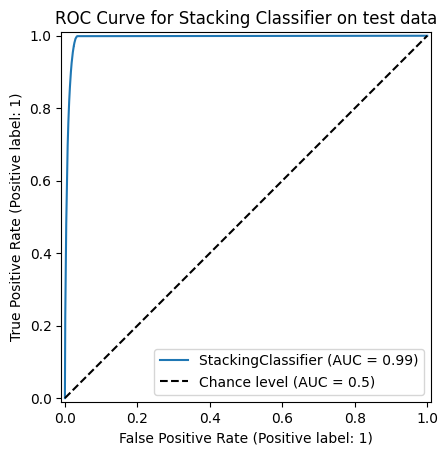

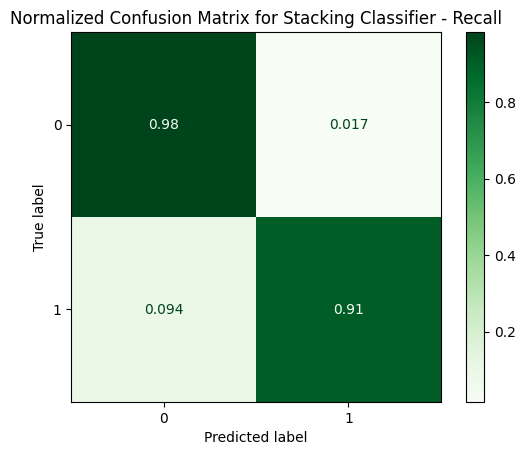

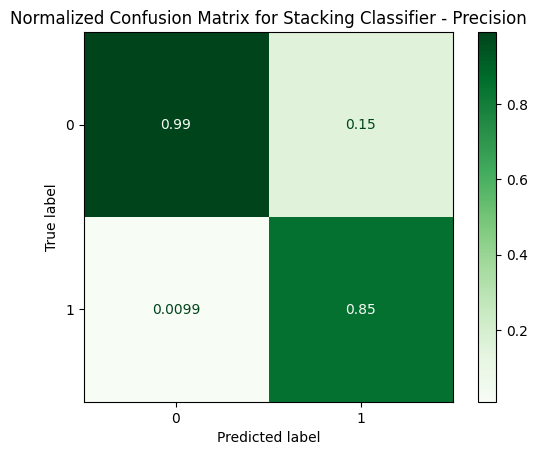

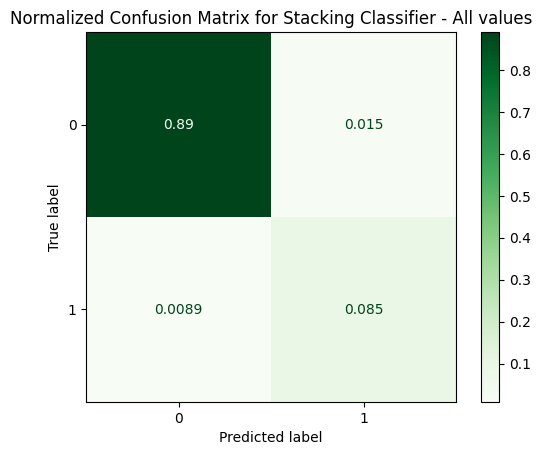

In [121]:
classification_report_stack_clf = metrics.classification_report(np.ravel(ytest), 
                                                               stack_clf.predict(xtest))

print("Classification report for Stacking Classifier on test data: \n\n", classification_report_stack_clf)

roc_curve_test_stack_clf = metrics.RocCurveDisplay.from_estimator(stack_clf, 
                                                                  xtest, 
                                                                  np.ravel(ytest), 
                                                                  plot_chance_level=True)
plt.title('ROC Curve for Stacking Classifier on test data')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(stack_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Stacking Classifier - Recall')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(stack_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Stacking Classifier - Precision')
plt.show()

ax = metrics.ConfusionMatrixDisplay.from_estimator(stack_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Stacking Classifier - All values')
plt.show()

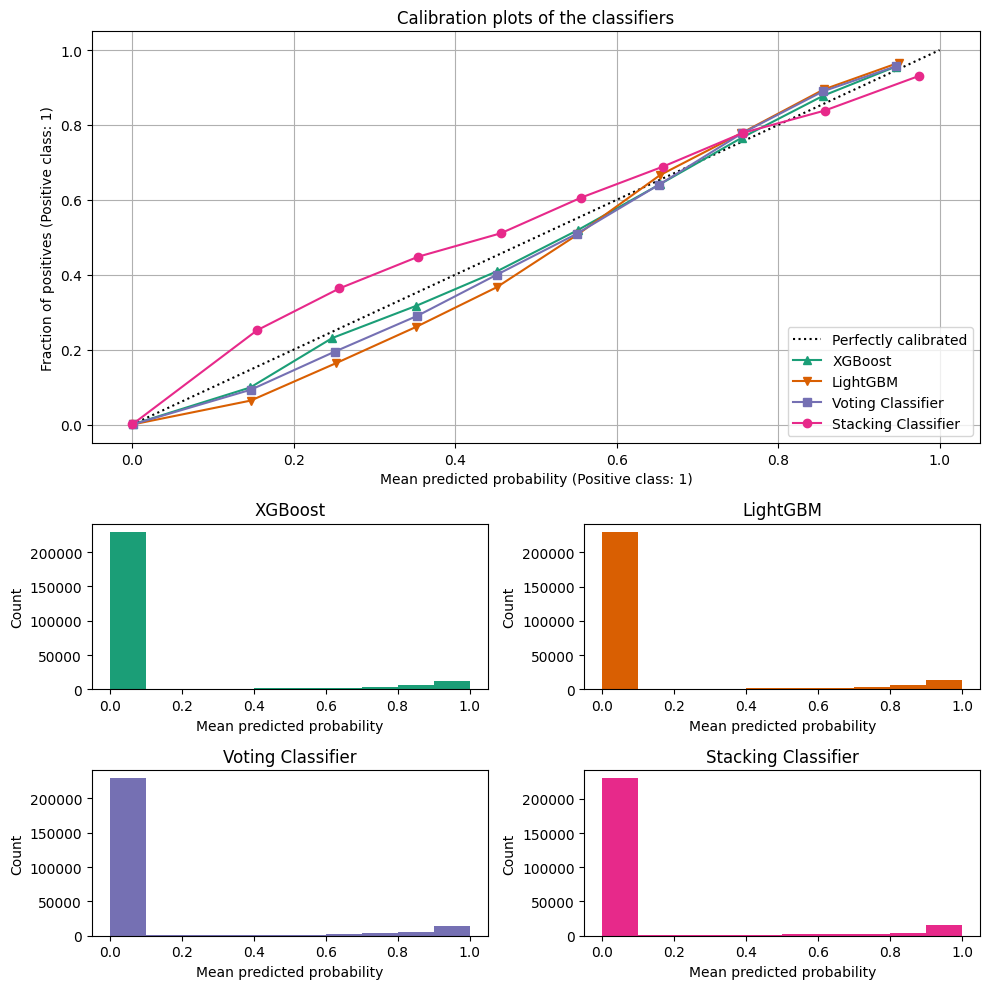

In [122]:
clf_list = [
    (xgb_data_preprocess_pipeline, "XGBoost"),
    (lgbm_data_preprocess_pipeline, "LightGBM"),
    (vote_clf, "Voting Classifier"),
    (stack_clf, "Stacking Classifier"),
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(xtest, np.ravel(ytest))
    display = CalibrationDisplay.from_estimator(
        clf,
        xtest,
        np.ravel(ytest),
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots of the classifiers")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()